![](http://www.homecredit.net/~/media/Images/H/Home-Credit-Group/image-gallery/full/image-gallery-01-11-2016-b.png)

# <a id='1'>1. Introduction</a>

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

 # <a id='2'>2. Retrieving the Data</a>

In [1]:
# Librairies personnalisées
from my_functions.common_functions import *
from my_functions.uni_bi_variate_functions import *

import gc
import re
import time
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()

# import cufflinks and offline mode
import cufflinks as cf
cf.go_offline()

# # Supress unnecessary warnings so that presentation looks clean
# import warnings
# warnings.filterwarnings("ignore")

In [3]:
import os
path_data = './Projet+Mise+en+prod+-+home-credit-default-risk/'
files = os.listdir(path_data)
print(files)

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'data-boruta-light.csv', 'data-boruta-shap-light.csv', 'data-boruta-shap.csv', 'data-boruta-shap0.csv', 'data-boruta.csv', 'data-origin.csv', 'data-sample.csv', 'data.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [3]:
# Remove the useless files
for name in ['application_test', 'sample_submission', 'HomeCredit_columns_description', 'data']:
    if name+'.csv' in files:
        files.remove(name+'.csv')

In [4]:
dfs = {}
for file in files:
    print('Loading:', file, '...')
    dfs[file.replace('.csv','')] = pd.read_csv(path_data+file)
print('All data loaded.')

Loading: application_train.csv ...
Loading: bureau.csv ...
Loading: bureau_balance.csv ...
Loading: credit_card_balance.csv ...
Loading: data-boruta-light.csv ...
Loading: data-boruta-shap-light.csv ...
Loading: data-boruta-shap.csv ...
Loading: data-boruta.csv ...
Loading: data-origin.csv ...
Loading: data-sample.csv ...
Loading: installments_payments.csv ...
Loading: POS_CASH_balance.csv ...
Loading: previous_application.csv ...
All data loaded.


# <a id='5'> Data Exploration & Cleanning</a>

## Application Data

Le data set contient :
	- 307511 lignes et 122 colonnes.
	- 9152465 valeurs manquantes, ce qui représente 24.4 % du data set.


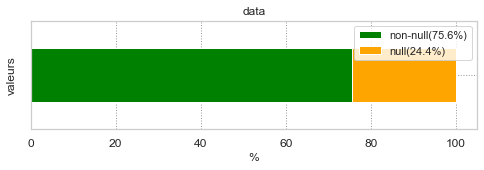

Voici les colonnes avec NaNs:


0               1                2   \
Column    COMMONAREA_MEDI  COMMONAREA_AVG  COMMONAREA_MODE   
#NaN               214865          214865           214865   
%NaN                69.87           69.87            69.87   
#Not_NaN            92646           92646            92646   
%Not_NaN            30.13           30.13            30.13   

                                3                         4   \
Column    NONLIVINGAPARTMENTS_MEDI  NONLIVINGAPARTMENTS_MODE   
#NaN                        213514                    213514   
%NaN                         69.43                     69.43   
#Not_NaN                     93997                     93997   
%Not_NaN                     30.57                     30.57   

                               5                   6                      7   \
Column    NONLIVINGAPARTMENTS_AVG  FONDKAPREMONT_MODE  LIVINGAPARTMENTS_MODE   
#NaN                       213514              210295                 210199   
%NaN                        69.43               68.39                  68.35   
#Not_NaN                    93997               97216                  97312   
%Not_NaN                    30.57               31.61                  31.65   

                             8                     9               10  \
Column    LIVINGAPARTMENTS_MEDI  LIVINGAPARTMENTS_AVG  FLOORSMIN_MODE   
#NaN                     210199                210199          208642   
%NaN                      68.35                 68.35           67.85   
#Not_NaN                  97312                 97312           98869   
%Not_NaN                  31.65                 31.65           32.15   

                      11             12                13                14  \
Column    FLOORSMIN_MEDI  FLOORSMIN_AVG  YEARS_BUILD_MODE  YEARS_BUILD_MEDI   
#NaN              208642         208642            204488            204488   
%NaN               67.85          67.85              66.5              66.5   
#Not_NaN           98869          98869            103023            103023   
%Not_NaN           32.15          32.15              33.5              33.5   

                       15           16            17             18  \
Column    YEARS_BUILD_AVG  OWN_CAR_AGE  LANDAREA_AVG  LANDAREA_MEDI   
#NaN               204488       202929        182590         182590   
%NaN                 66.5        65.99         59.38          59.38   
#Not_NaN           103023       104582        124921         124921   
%Not_NaN             33.5        34.01         40.62          40.62   

                     19                 20                21  \
Column    LANDAREA_MODE  BASEMENTAREA_MEDI  BASEMENTAREA_AVG   
#NaN             182590             179943            179943   
%NaN              59.38              58.52             58.52   
#Not_NaN         124921             127568            127568   
%Not_NaN          40.62              41.48             41.48   

                         22            23                  24  \
Column    BASEMENTAREA_MODE  EXT_SOURCE_1  NONLIVINGAREA_MEDI   
#NaN                 179943        173378              169682   
%NaN                  58.52         56.38               55.18   
#Not_NaN             127568        134133              137829   
%Not_NaN              41.48         43.62               44.82   

                          25                 26              27  \
Column    NONLIVINGAREA_MODE  NONLIVINGAREA_AVG  ELEVATORS_MEDI   
#NaN                  169682             169682          163891   
%NaN                   55.18              55.18            53.3   
#Not_NaN              137829             137829          143620   
%Not_NaN               44.82              44.82            46.7   

                      28             29                  30               31  \
Column    ELEVATORS_MODE  ELEVATORS_AVG  WALLSMATERIAL_MODE  APARTMENTS_MODE   
#NaN              163891         163891              156341           156061   
%NaN                53.3

Voici un sous-échantillon aléatoire :


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
189753      320014       0         Cash loans           M            N   
249400      388556       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
189753               Y             0           83250.0    253737.0   
249400               Y             1          135000.0    125361.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
189753      14296.5         229500.0   Unaccompanied        Pensioner   
249400       9252.0         103500.0   Unaccompanied    State servant   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
189753  Secondary / secondary special  Single / not married   
249400  Secondary / secondary special  Single / not married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
189753  House / apartment                    0.007020      -23710   
249400  House / apartment                    0.006629      -12750   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
189753         365243            -5856.0            -4676          NaN   
249400          -1229            -3588.0            -5135          NaN   

        FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
189753           1               0                0                 1   
249400           1               1                0                 1   

        FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
189753           0           0             NaN              1.0   
249400           0           0      Core staff              2.0   

        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
189753                     2                            2   
249400                     2                            2   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
189753                  WEDNESDAY                       10   
249400                   SATURDAY                        9   

        REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
189753                           0                           0   
249400                           0                           0   

        LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
189753                            0                       0   
249400                            0                       1   

        REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  \
189753                       0                        0               XNA   
249400                       1                        0          Medicine   

        EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  \
189753           NaN      0.213225      0.232725             NaN   
249400           NaN      0.600060      0.379100             NaN   

        BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  \
189753               NaN                          NaN              NaN   
249400               NaN                          NaN              NaN   

        COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  \
189753             NaN            NaN            NaN            NaN   
249400             NaN            NaN            NaN            NaN   

        FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  \
189753            NaN           NaN                   NaN             NaN   
249400            NaN           NaN                   NaN             NaN   

        NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  \
189753                      NaN                NaN              NaN   
249400                      NaN                NaN              NaN   

        BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  \
189753                NaN                           NaN               NaN   
249400                NaN                           NaN               NaN   


Doublons: 0


In [5]:
df = dfs['application_train']
verifier_taille(df, name)
afficher_echantillon(df)
print('Doublons:', len(doublons(df[df.columns[0]])))

### <a id='5-1'> Target Balance</a>

0 (0.0%) valeurs manquantes.


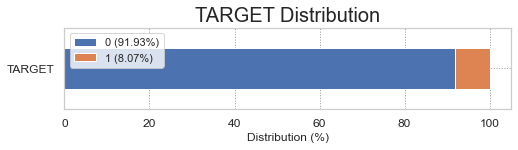

In [6]:
print(nan_cols(pd.DataFrame(df['TARGET']))['#NaN'].values[0], '('+str(nan_cols(pd.DataFrame(df['TARGET']))['%NaN'].values[0])+'%) valeurs manquantes.')
plotBalance(df, ['TARGET'])

La TARGET, difficultés de paiement, est très déséquilibrées avec une majorité de 92% de clients sans difficultés (classe négative). Cela est problématique et doit être pris en compte pour construire un model performant qui désavantagera aucune classe.

### Qualitative Variables

In [7]:
categorical_columns = colsOfType(df, ['object'])
print('Variables Catégorielles', categorical_columns)

Variables Catéorielles ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


#### Missing Data

Column    #NaN   %NaN  #Not_NaN  %Not_NaN
0   FONDKAPREMONT_MODE  210295  68.39     97216     31.61
1   WALLSMATERIAL_MODE  156341  50.84    151170     49.16
2       HOUSETYPE_MODE  154297  50.18    153214     49.82
3  EMERGENCYSTATE_MODE  145755  47.40    161756     52.60
4      OCCUPATION_TYPE   96391  31.35    211120     68.65
5      NAME_TYPE_SUITE    1292   0.42    306219     99.58

Le data set contient :
	- 307511 lignes et 122 colonnes.
	- 8388094 valeurs manquantes, ce qui représente 22.36 % du data set.


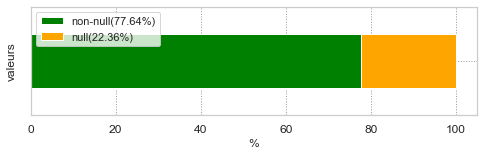

Voici les colonnes avec NaNs:


0                1               2   \
Column    COMMONAREA_MODE  COMMONAREA_MEDI  COMMONAREA_AVG   
#NaN               214865           214865          214865   
%NaN                69.87            69.87           69.87   
#Not_NaN            92646            92646           92646   
%Not_NaN            30.13            30.13           30.13   

                                3                        4   \
Column    NONLIVINGAPARTMENTS_MODE  NONLIVINGAPARTMENTS_AVG   
#NaN                        213514                   213514   
%NaN                         69.43                    69.43   
#Not_NaN                     93997                    93997   
%Not_NaN                     30.57                    30.57   

                                5                      6   \
Column    NONLIVINGAPARTMENTS_MEDI  LIVINGAPARTMENTS_MEDI   
#NaN                        213514                 210199   
%NaN                         69.43                  68.35   
#Not_NaN                     93997                  97312   
%Not_NaN                     30.57                  31.65   

                            7                      8               9   \
Column    LIVINGAPARTMENTS_AVG  LIVINGAPARTMENTS_MODE  FLOORSMIN_MEDI   
#NaN                    210199                 210199          208642   
%NaN                     68.35                  68.35           67.85   
#Not_NaN                 97312                  97312           98869   
%Not_NaN                 31.65                  31.65           32.15   

                      10             11               12                13  \
Column    FLOORSMIN_MODE  FLOORSMIN_AVG  YEARS_BUILD_AVG  YEARS_BUILD_MODE   
#NaN              208642         208642           204488            204488   
%NaN               67.85          67.85             66.5              66.5   
#Not_NaN           98869          98869           103023            103023   
%Not_NaN           32.15          32.15             33.5              33.5   

                        14           15             16             17  \
Column    YEARS_BUILD_MEDI  OWN_CAR_AGE  LANDAREA_MEDI  LANDAREA_MODE   
#NaN                204488       202929         182590         182590   
%NaN                  66.5        65.99          59.38          59.38   
#Not_NaN            103023       104582         124921         124921   
%Not_NaN              33.5        34.01          40.62          40.62   

                    18                 19                20  \
Column    LANDAREA_AVG  BASEMENTAREA_MODE  BASEMENTAREA_AVG   
#NaN            182590             179943            179943   
%NaN             59.38              58.52             58.52   
#Not_NaN        124921             127568            127568   
%Not_NaN         40.62              41.48             41.48   

                         21            22                  23  \
Column    BASEMENTAREA_MEDI  EXT_SOURCE_1  NONLIVINGAREA_MODE   
#NaN                 179943        173378              169682   
%NaN                  58.52         56.38               55.18   
#Not_NaN             127568        134133              137829   
%Not_NaN              41.48         43.62               44.82   

                         24                  25              26  \
Column    NONLIVINGAREA_AVG  NONLIVINGAREA_MEDI  ELEVATORS_MEDI   
#NaN                 169682              169682          163891   
%NaN                  55.18               55.18            53.3   
#Not_NaN             137829              137829          143620   
%Not_NaN              44.82               44.82            46.7   

                      27             28              29               30  \
Column    ELEVATORS_MODE  ELEVATORS_AVG  APARTMENTS_AVG  APARTMENTS_MEDI   
#NaN              163891         163891          156061           156061   
%NaN                53.3           53.3           50.75            50.75   
#Not_NaN          143620         143620          151450           151450   
%Not

In [8]:
categorical_columns = colsOfType(df, 'object')
categ_nan_cols = nan_cols(df[categorical_columns], -1)
display(categ_nan_cols)
categ_nan_cols_list = categ_nan_cols['Column'].tolist()
df[categ_nan_cols_list]=df[categ_nan_cols_list].replace(np.nan,'Unknwon')
verifier_taille(df)

#### <a href="2.3"> Contract Type</a>

0 (0.0%) valeurs manquantes.


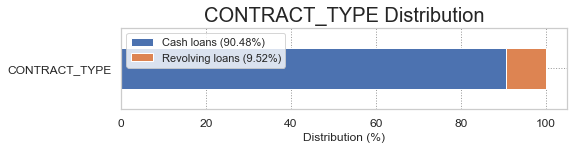

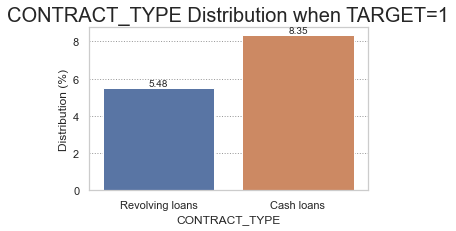

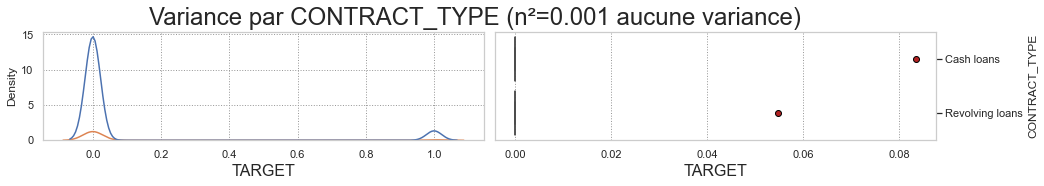

In [9]:
df = renameCol(df, 'NAME_CONTRACT_TYPE', 'CONTRACT_TYPE')
print(nan_cols(pd.DataFrame(df['CONTRACT_TYPE']))['#NaN'].values[0], '('+str(nan_cols(pd.DataFrame(df['CONTRACT_TYPE']))['%NaN'].values[0])+'%) valeurs manquantes.')
plotBalance(df, ['CONTRACT_TYPE'])
plotBalance(df, ['TARGET', 'CONTRACT_TYPE', 'SK_ID_CURR'], mask=1, heigth=3, width=5)
ANOVA(df, 'CONTRACT_TYPE', ['TARGET'], heigth=1., yloc=1.05)

Les contrats sont majoritairement de type "Cash loans". De plus, cette variable n’a quasiment aucun impact sur la TARGET, mais il est à noter que les clients avec ce type de contrat auront une plus grande probabilité de rencontrer des difficultés de paiement que les clients avec un contrat de type "Revolving loans".

#### <a href="2.3"> Gender Type of Applicants </a>

0 (0.0%) valeurs manquantes.


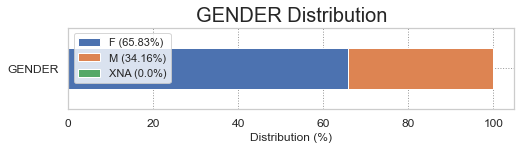

In [10]:
df = renameCol(df, 'CODE_GENDER', 'GENDER')
print(nan_cols(pd.DataFrame(df['GENDER']))['#NaN'].values[0], '('+str(nan_cols(pd.DataFrame(df['GENDER']))['%NaN'].values[0])+'%) valeurs manquantes.')
plotBalance(df, ['GENDER'])

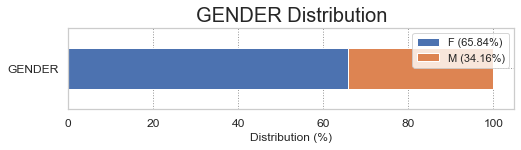

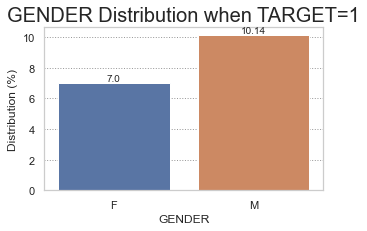

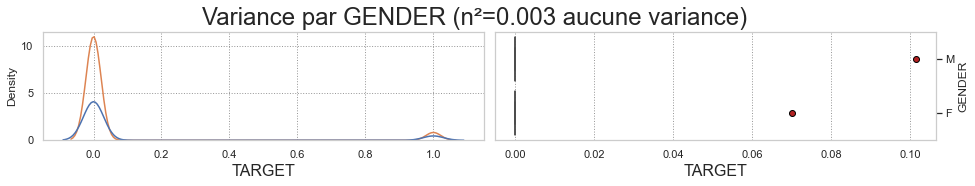

In [11]:
# df['GENDER'].replace('XNA', np.nan, inplace=True)
df=df.query('GENDER!="XNA"')

plotBalance(df, ['GENDER'])
plotBalance(df, ['TARGET', 'GENDER', 'SK_ID_CURR'], mask=1, heigth=3, width=5)
ANOVA(df, 'GENDER', ['TARGET'], heigth=1., yloc=1.05)

Les femmes sont majoritaires à 66%, et même si le genre du client n’a presque aucun impact sur la TARGET, elles ont moins de chances de rencontrer des problèmes de paiement que les hommes.

#### <a href="2.4"> Family Status of Applicants </a>

0 (0.0%) valeurs manquantes.


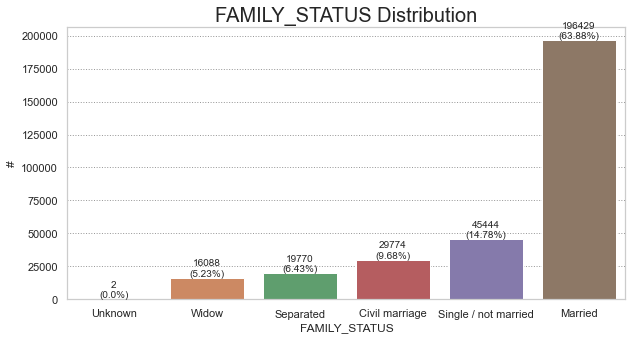

In [12]:
df = renameCol(df, 'NAME_FAMILY_STATUS', 'FAMILY_STATUS')
print(nan_cols(pd.DataFrame(df['FAMILY_STATUS']))['#NaN'].values[0], '('+str(nan_cols(pd.DataFrame(df['FAMILY_STATUS']))['%NaN'].values[0])+'%) valeurs manquantes.')
barplotDistribution(df['FAMILY_STATUS'])

In [13]:
df[df['FAMILY_STATUS']=='Unknown']

SK_ID_CURR  TARGET    CONTRACT_TYPE GENDER FLAG_OWN_CAR  \
41982       148605       0  Revolving loans      M            N   
187348      317181       0  Revolving loans      F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                Y             0          450000.0    675000.0   
187348               Y             0          202500.0    585000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982       33750.0              NaN         Unknwon  Commercial associate   
187348      29250.0              NaN         Unknwon  Commercial associate   

       NAME_EDUCATION_TYPE FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary       Unknown  Municipal apartment   
187348    Higher education       Unknown    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
41982                     0.015221      -12396          -1161   
187348                    0.031329      -12844           -232   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
41982             -3265.0            -4489          NaN           1   
187348            -1597.0            -1571          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
41982                1                1                 1           1   
187348               1                0                 1           0   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
41982            0        Managers              NaN                     2   
187348           0     Accountants              NaN                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
41982                             2                   THURSDAY   
187348                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
41982                        15                           0   
187348                       14                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
41982                            1                            1   
187348                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
41982                        0                       1   
187348                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  \
41982                         1               Insurance      0.628564   
187348                        0  Business Entity Type 2           NaN   

        EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
41982       0.700618           NaN             NaN               NaN   
187348      0.645168      0.670652          0.1031            0.0467   

        YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
41982                           NaN              NaN             NaN   
187348                        0.997           0.9592          0.0081   

        ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  \
41982             NaN            NaN            NaN            NaN   
187348           0.08          0.069          0.375         0.4167   

        LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  \
41982            NaN                   NaN             NaN   
187348           NaN                0.0841           0.088   

        NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  \
41982                       NaN                NaN              NaN   
187348                      0.0                0.0            0.105   

        BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  \
41982                 NaN                           NaN               NaN   
187348             0.0485                         0.997            0.9608   

        COMMONAREA_MODE  ELEVATORS_MOD

0 (0.0%) valeurs manquantes.


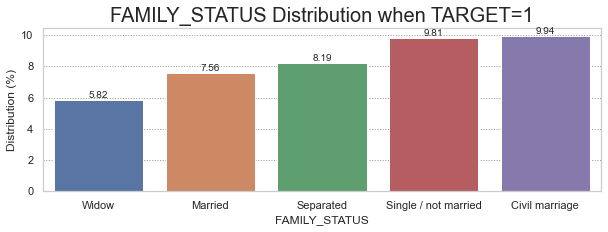

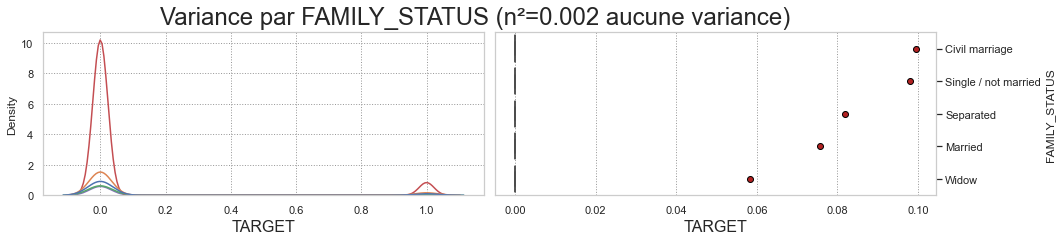

In [14]:
# Remove the 2 Unknowns
df = df[df['FAMILY_STATUS']!='Unknown']

print(nan_cols(pd.DataFrame(df['FAMILY_STATUS']))['#NaN'].values[0], '('+str(nan_cols(pd.DataFrame(df['FAMILY_STATUS']))['%NaN'].values[0])+'%) valeurs manquantes.')
plotBalance(df, ['TARGET', 'FAMILY_STATUS', 'SK_ID_CURR'], mask=1, heigth=3)
ANOVA(df, 'FAMILY_STATUS', ['TARGET'], heigth=.6, yloc=1.)

La majorité (64%) des clients sont mariés. La difficulté de paiement ne varie presque pas selon le statut familial. Tout de même, les veuves présentent une moindre probabilité de difficultés de paiement. 

#### <a id='5-4'> Who accompanied client when applying for the  application</a>

In [15]:
df = renameCol(df, 'NAME_TYPE_SUITE', 'TYPE_SUITE')
print(nan_cols(pd.DataFrame(df['TYPE_SUITE']))['#NaN'].values[0], '('+str(nan_cols(pd.DataFrame(df['TYPE_SUITE']))['%NaN'].values[0])+'%) valeurs manquantes.')

0 (0.0%) valeurs manquantes.


0 (0.0%) valeurs manquantes.


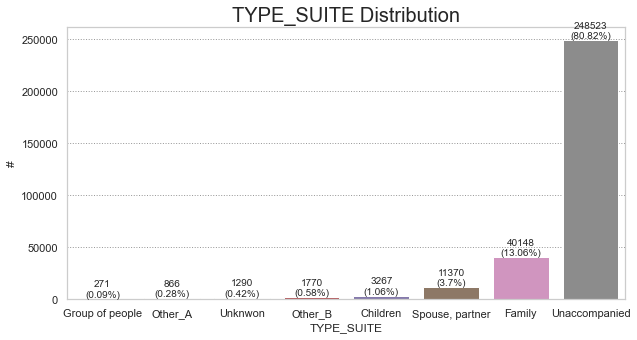

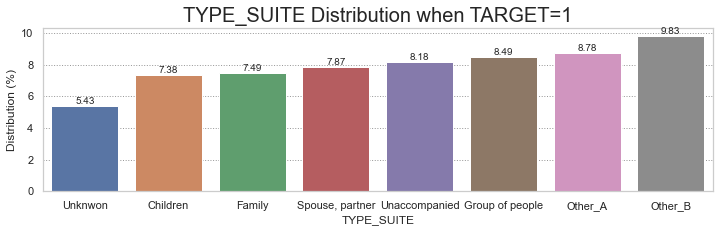

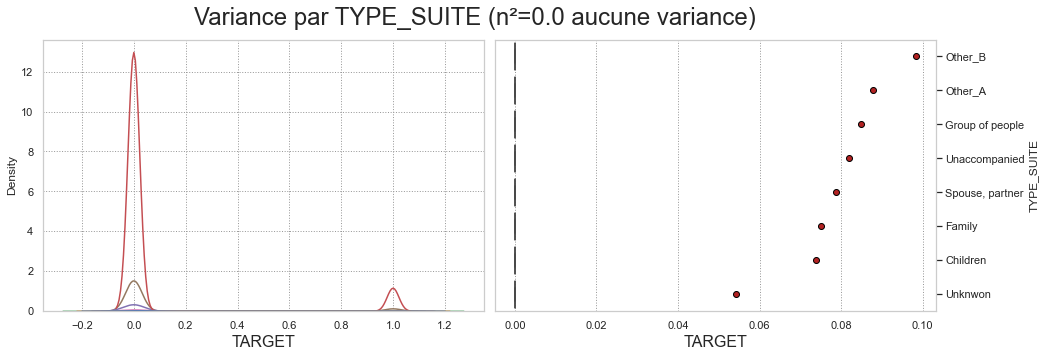

In [16]:
df = df[~df['TYPE_SUITE'].isnull()]
print(nan_cols(pd.DataFrame(df['TYPE_SUITE']))['#NaN'].values[0], '('+str(nan_cols(pd.DataFrame(df['TYPE_SUITE']))['%NaN'].values[0])+'%) valeurs manquantes.')
barplotDistribution(df['TYPE_SUITE'])
plotBalance(df, ['TARGET', 'TYPE_SUITE', 'SK_ID_CURR'], mask=1, heigth=3, width=12)
ANOVA(df, 'TYPE_SUITE', ['TARGET'], heigth=.7, yloc=.97)

La majorité (81%) des clients sont venus seuls déposer leur application. La TARGET ne subit aucune variance par la variable TYPE_SUITE. 

#### <a id='5-14-1'> Income sources of Applicants</a>

0 (0.0%) valeurs manquantes.


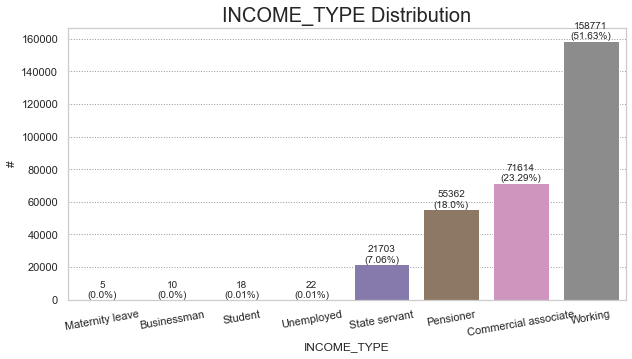

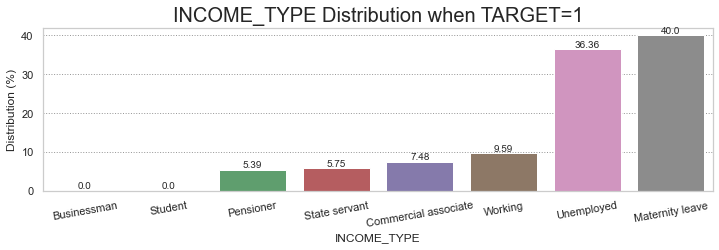

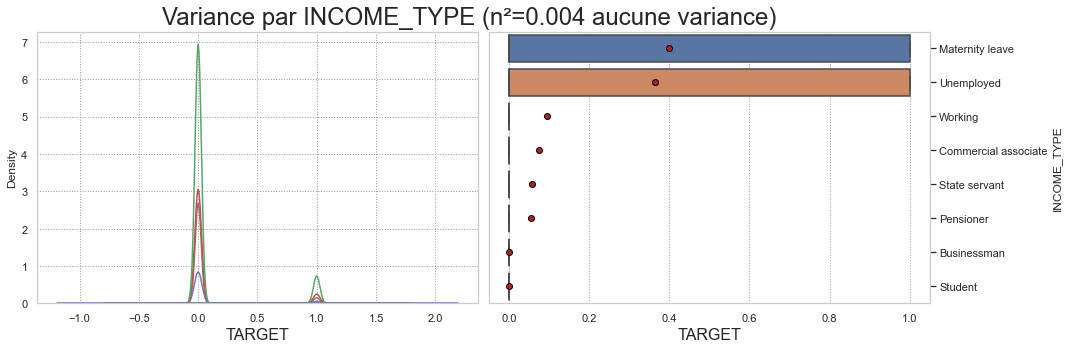

In [17]:
df = renameCol(df, 'NAME_INCOME_TYPE', 'INCOME_TYPE')
print(nan_cols(pd.DataFrame(df['INCOME_TYPE']))['#NaN'].values[0], '('+str(nan_cols(pd.DataFrame(df['INCOME_TYPE']))['%NaN'].values[0])+'%) valeurs manquantes.')
barplotDistribution(df['INCOME_TYPE'], rotation=10)
plotBalance(df, ['TARGET', 'INCOME_TYPE', 'SK_ID_CURR'], mask=1, heigth=3, width=12, rotation=10)
ANOVA(df, 'INCOME_TYPE', ['TARGET'], heigth=.7, yloc=.95)

À 55 personnes près, les revenus de tous les clients sont des salaires ou des pensions. De plus, la plupart des types de revenus n’influent pas sur les difficultés de paiement, à l’exception de "Unemployed" et "Maternity leave" qui ont un risque plus élevé d’impaiement, et "Businessman" et "Student" qui ne présentent aucune difficulté de paiement. Cependant, cette interprétation est très fortement contestable au vu du très faible nombre de clients concernés (55).

#### <a id='5-11'> Education of Applicants</a>

0 (0.0%) valeurs manquantes.


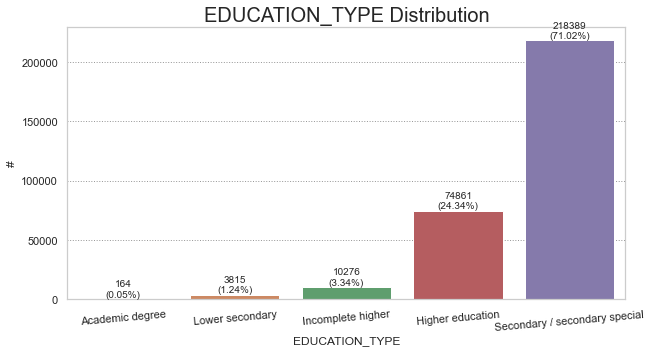

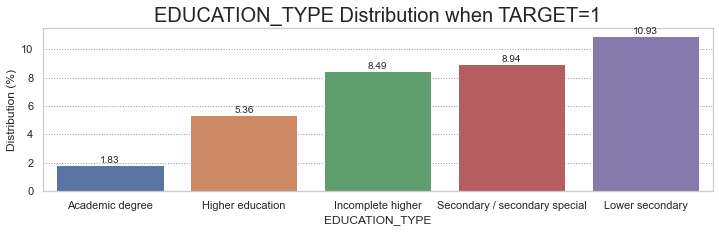

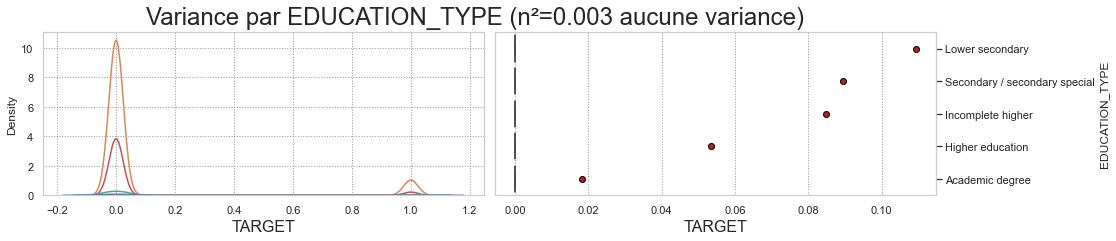

In [18]:
df = renameCol(df, 'NAME_EDUCATION_TYPE', 'EDUCATION_TYPE')
print(nan_cols(pd.DataFrame(df['EDUCATION_TYPE']))['#NaN'].values[0], '('+str(nan_cols(pd.DataFrame(df['EDUCATION_TYPE']))['%NaN'].values[0])+'%) valeurs manquantes.')
barplotDistribution(df['EDUCATION_TYPE'], rotation=5)
plotBalance(df, ['TARGET', 'EDUCATION_TYPE', 'SK_ID_CURR'], mask=1, heigth=3, width=12)
ANOVA(df, 'EDUCATION_TYPE', ['TARGET'], heigth=.7, yloc=1.)

La plupart des clients (71%) ont un niveau d’éducation faible (secondaire), et ce niveau n’a pas de grand impact sur les difficultés de paiement. Néanmoins, peut constater la corrélation suivante : plus le niveau d’éducation est faible plus le risque d’avoir des difficultés de paiement est élevé.

#### <a id="2.8"> Housing of Applicants </a>

0 (0.0%) valeurs manquantes.


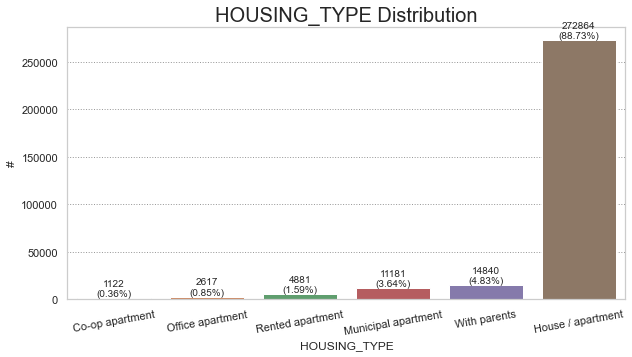

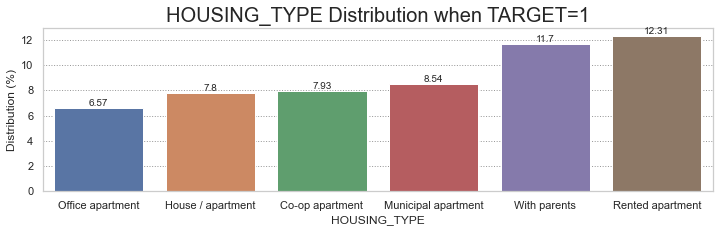

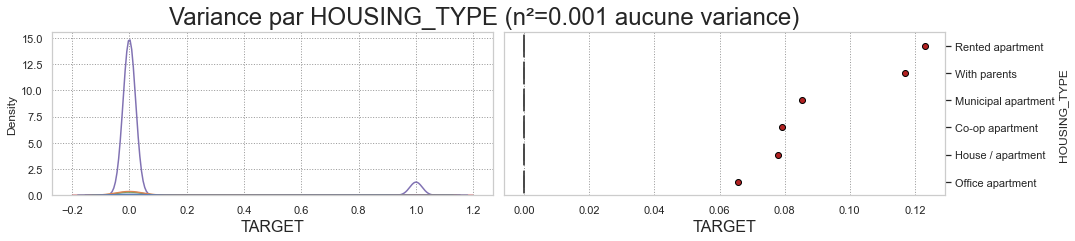

In [19]:
df = renameCol(df, 'NAME_HOUSING_TYPE', 'HOUSING_TYPE')
print(nan_cols(pd.DataFrame(df['HOUSING_TYPE']))['#NaN'].values[0], '('+str(nan_cols(pd.DataFrame(df['HOUSING_TYPE']))['%NaN'].values[0])+'%) valeurs manquantes.')
barplotDistribution(df['HOUSING_TYPE'], rotation=10)
plotBalance(df, ['TARGET', 'HOUSING_TYPE', 'SK_ID_CURR'], mask=1, heigth=3, width=12)
ANOVA(df, 'HOUSING_TYPE', ['TARGET'], heigth=.6, yloc=1.)

La majorité des clients (89%) habitent dans leur propre maison/appartement. De plus la TARGET ne varient quasiment pas selon le type d’habitation du client. Cependant, les clients vivants avec leurs parents ou dans une location d’appartement ont un risque plus élevé de rencontrer des difficultés de paiements.

0 (0.0%) valeurs manquantes.


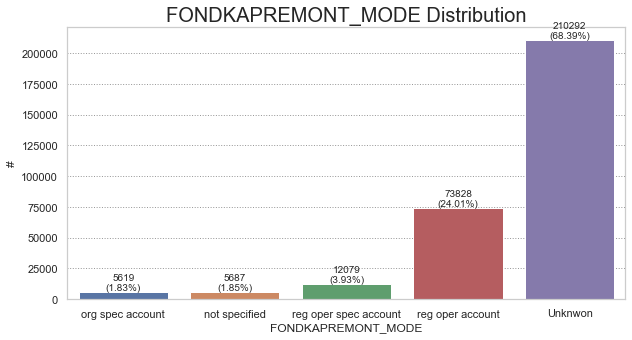

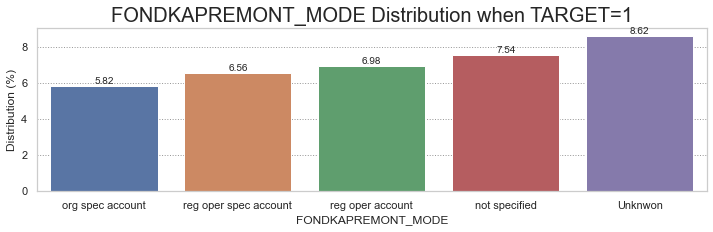

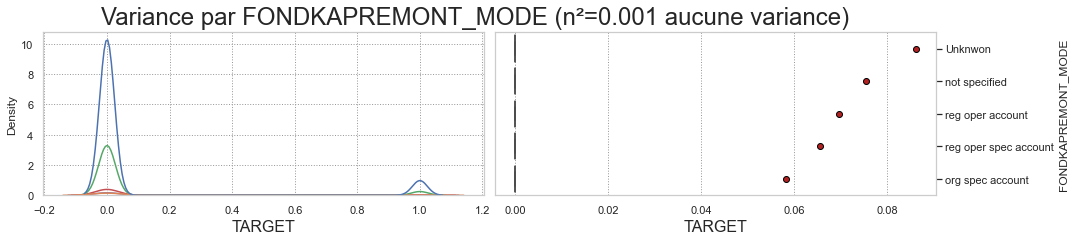

In [20]:
print(nan_cols(pd.DataFrame(df['FONDKAPREMONT_MODE']))['#NaN'].values[0], '('+str(nan_cols(pd.DataFrame(df['FONDKAPREMONT_MODE']))['%NaN'].values[0])+'%) valeurs manquantes.')
barplotDistribution(df['FONDKAPREMONT_MODE'])
plotBalance(df, ['TARGET', 'FONDKAPREMONT_MODE', 'SK_ID_CURR'], mask=1, heigth=3, width=12)
ANOVA(df, 'FONDKAPREMONT_MODE', ['TARGET'], heigth=.6, yloc=1.)

0 (0.0%) valeurs manquantes.


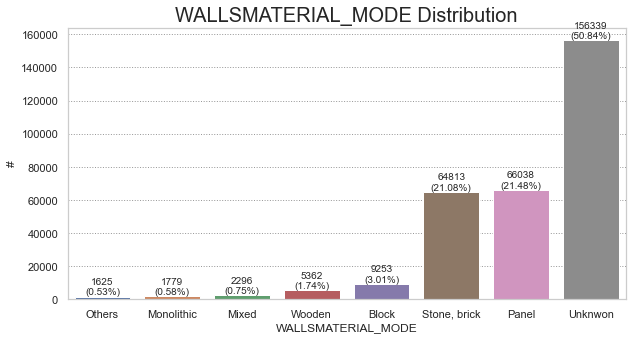

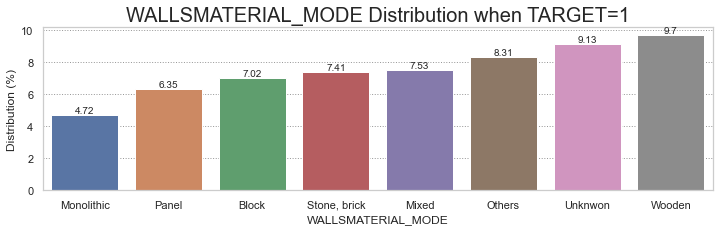

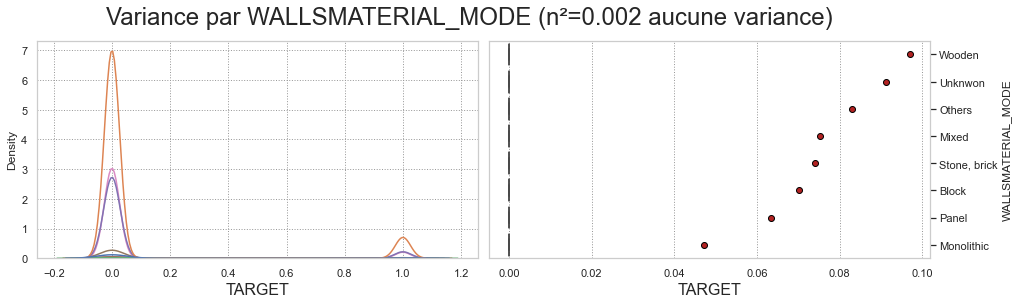

In [21]:
print(nan_cols(pd.DataFrame(df['WALLSMATERIAL_MODE']))['#NaN'].values[0], '('+str(nan_cols(pd.DataFrame(df['WALLSMATERIAL_MODE']))['%NaN'].values[0])+'%) valeurs manquantes.')
barplotDistribution(df['WALLSMATERIAL_MODE'])
plotBalance(df, ['TARGET', 'WALLSMATERIAL_MODE', 'SK_ID_CURR'], mask=1, heigth=3, width=12)
ANOVA(df, 'WALLSMATERIAL_MODE', ['TARGET'], heigth=.6, yloc=1.)

0 (0.0%) valeurs manquantes.


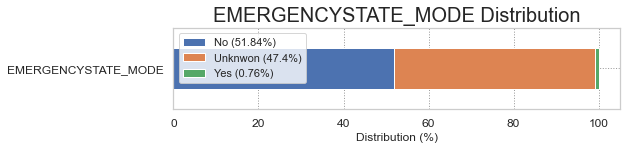

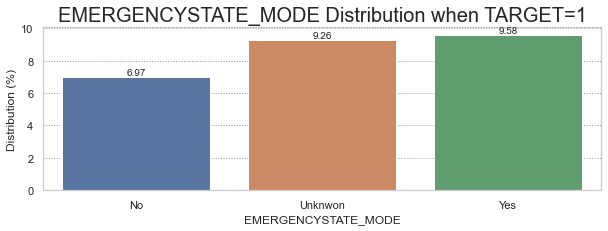

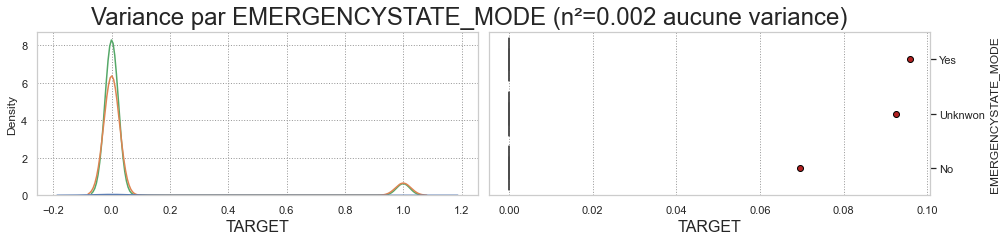

In [22]:
print(nan_cols(pd.DataFrame(df['EMERGENCYSTATE_MODE']))['#NaN'].values[0], '('+str(nan_cols(pd.DataFrame(df['EMERGENCYSTATE_MODE']))['%NaN'].values[0])+'%) valeurs manquantes.')
plotBalance(df, ['EMERGENCYSTATE_MODE'])
plotBalance(df, ['TARGET', 'EMERGENCYSTATE_MODE', 'SK_ID_CURR'], mask=1, heigth=3)
ANOVA(df, 'EMERGENCYSTATE_MODE', ['TARGET'], heigth=1, yloc=1.)

#### Occupation of Applicants

0 (0.0%) valeurs manquantes.


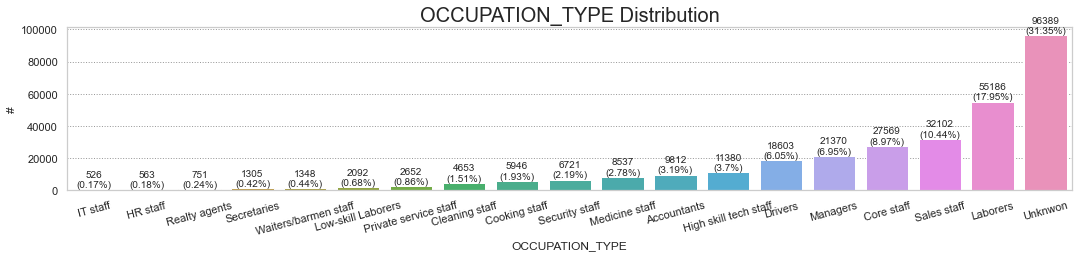

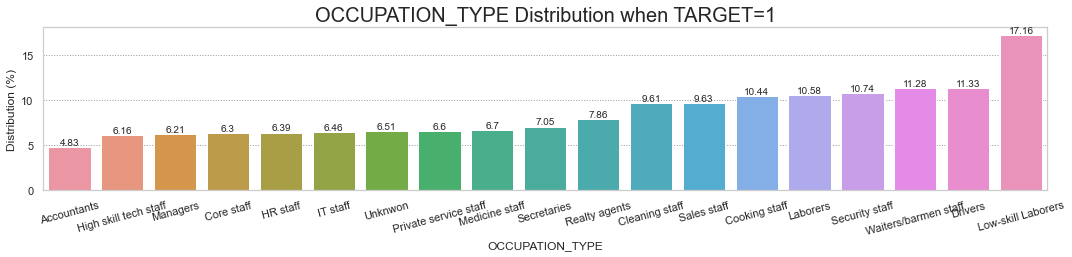

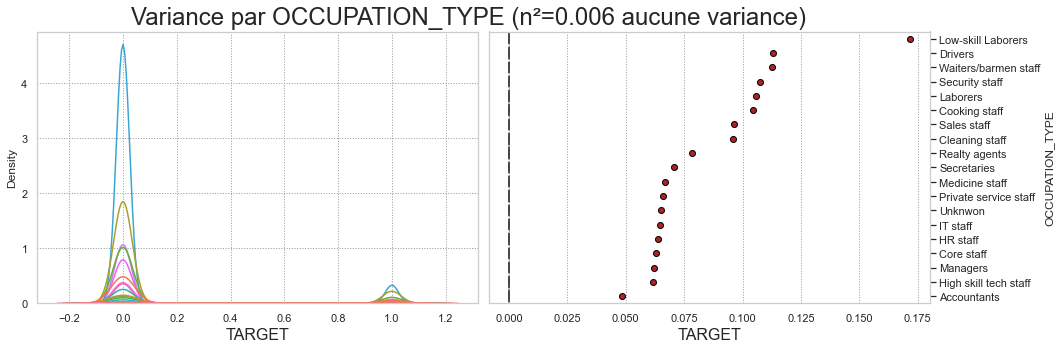

In [23]:
print(nan_cols(pd.DataFrame(df['OCCUPATION_TYPE']))['#NaN'].values[0], '('+str(nan_cols(pd.DataFrame(df['OCCUPATION_TYPE']))['%NaN'].values[0])+'%) valeurs manquantes.')
barplotDistribution(df['OCCUPATION_TYPE'], heigth=3, width=18, rotation=15)
plotBalance(df, ['TARGET', 'OCCUPATION_TYPE', 'SK_ID_CURR'], mask=1, heigth=3, width=18, rotation=15)
ANOVA(df, 'OCCUPATION_TYPE', ['TARGET'], heigth=.3, yloc=.95)

#### Organization Type of Applicants

0 (0.0%) valeurs manquantes.


c:\Users\Shadow\OneDrive - Université de Poitiers\Documents\OpenClassrooms\Projets\Notebooks OC\Projets\P7\model\my_functions\common_functions.py:180: UserWarning:

FixedFormatter should only be used together with FixedLocator



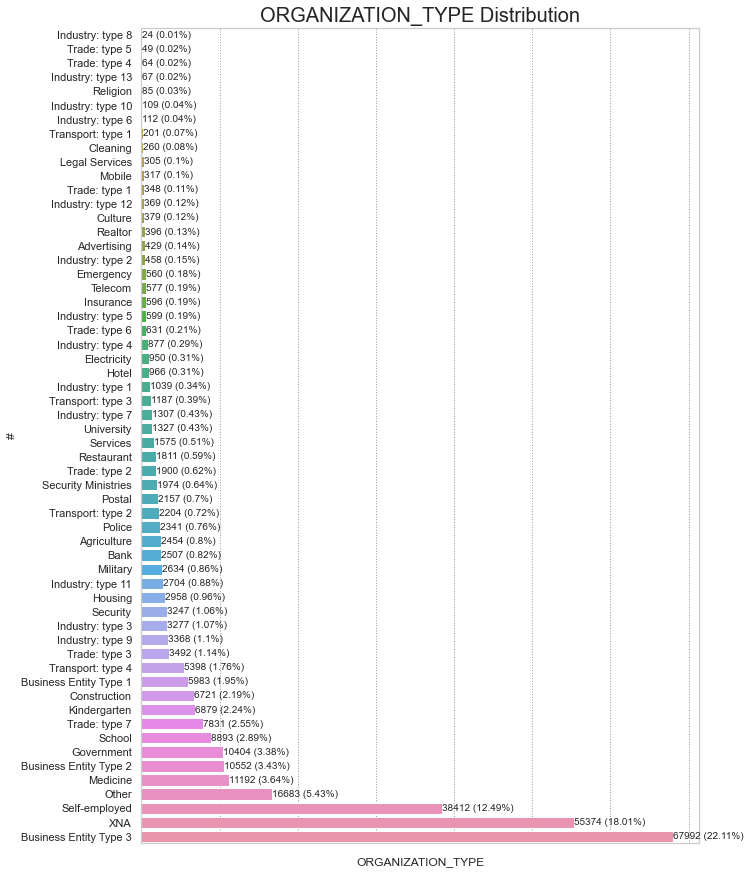

c:\Users\Shadow\OneDrive - Université de Poitiers\Documents\OpenClassrooms\Projets\Notebooks OC\Projets\P7\model\my_functions\common_functions.py:180: UserWarning:

FixedFormatter should only be used together with FixedLocator



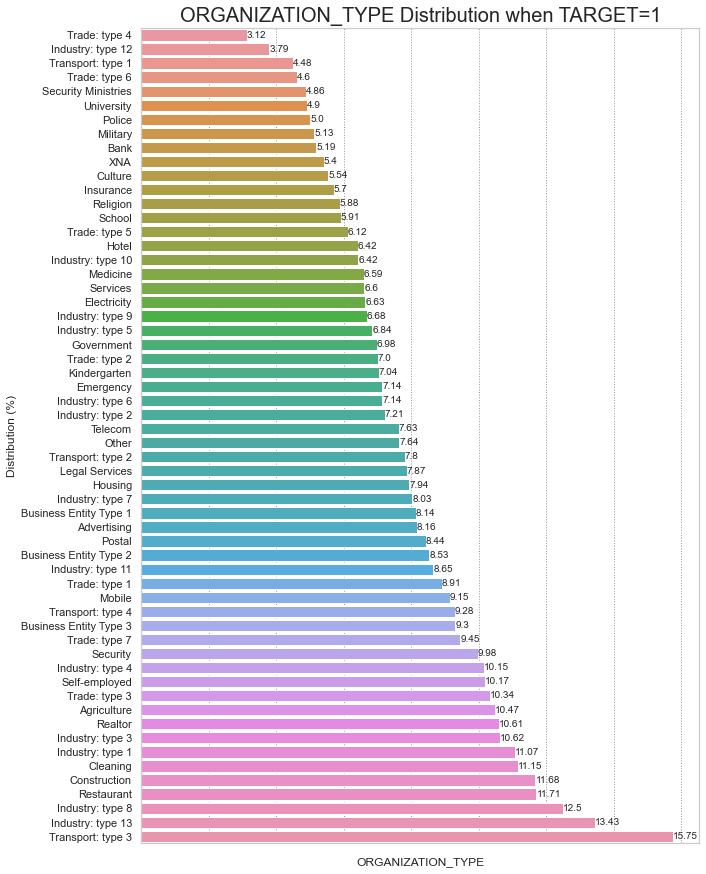

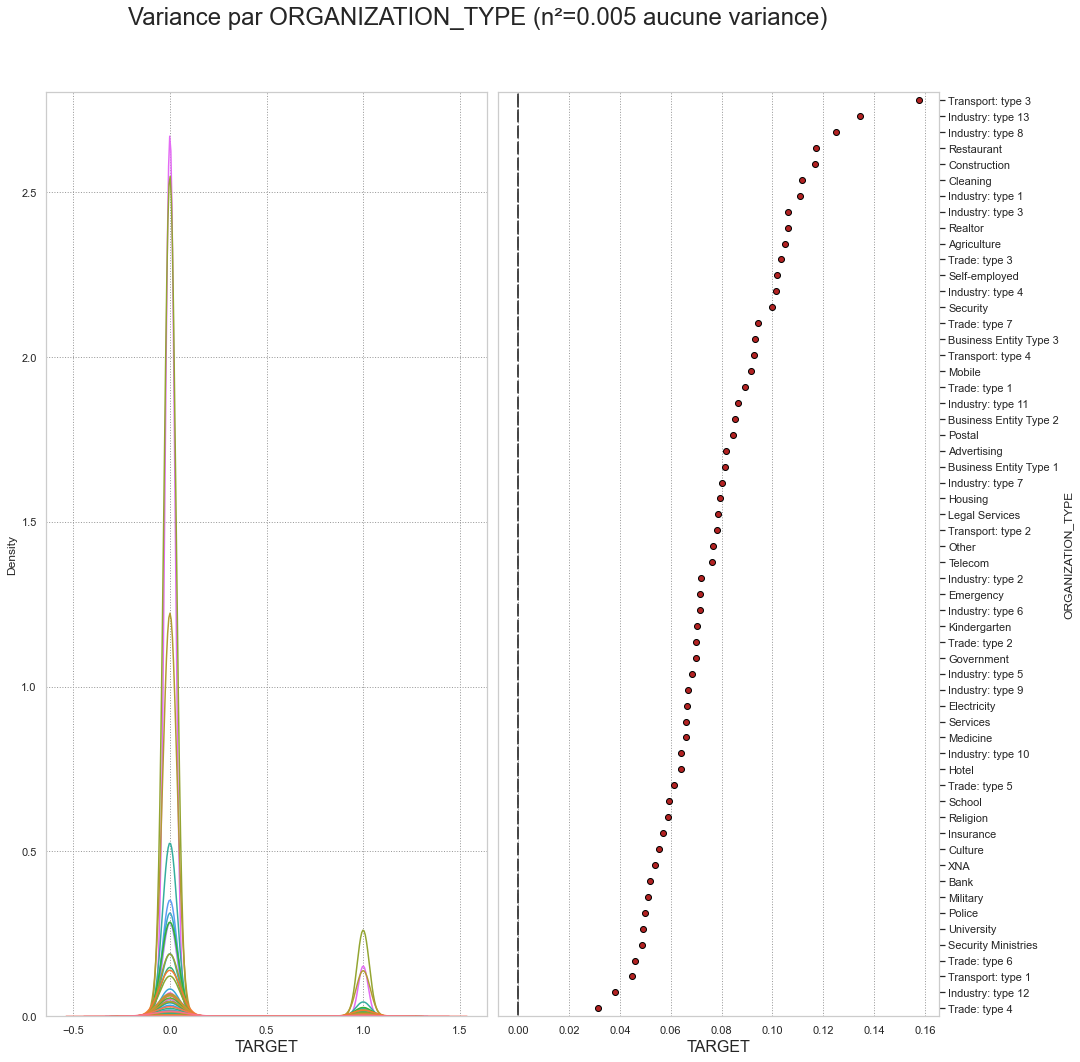

In [24]:
print(nan_cols(pd.DataFrame(df['ORGANIZATION_TYPE']))['#NaN'].values[0], '('+str(nan_cols(pd.DataFrame(df['ORGANIZATION_TYPE']))['%NaN'].values[0])+'%) valeurs manquantes.')
barplotDistribution(df['ORGANIZATION_TYPE'], heigth=15, width=10, rotation=10, orient='h')
plotBalance(df, ['TARGET', 'ORGANIZATION_TYPE', 'SK_ID_CURR'], mask=1, heigth=15, width=10, rotation=10, orient='h')
ANOVA(df, 'ORGANIZATION_TYPE', ['TARGET'], heigth=.3, yloc=.95)

#### Car Ownership of Applicants

0 (0.0%) valeurs manquantes.


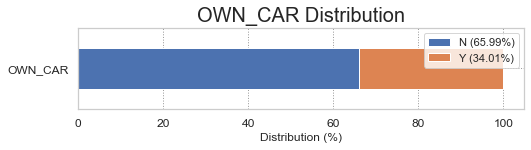

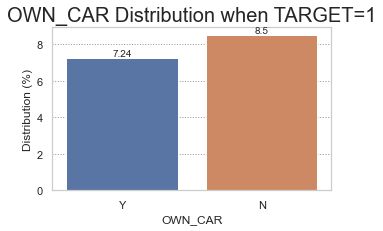

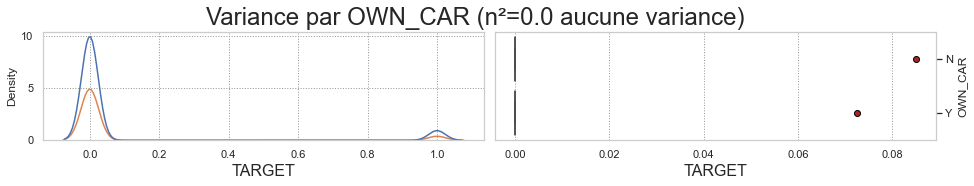

In [25]:
df = renameCol(df, 'FLAG_OWN_CAR', 'OWN_CAR')
print(nan_cols(pd.DataFrame(df['OWN_CAR']))['#NaN'].values[0], '('+str(nan_cols(pd.DataFrame(df['OWN_CAR']))['%NaN'].values[0])+'%) valeurs manquantes.')
plotBalance(df, ['OWN_CAR'])
plotBalance(df, ['TARGET', 'OWN_CAR', 'SK_ID_CURR'], mask=1, heigth=3, width=5)
ANOVA(df, 'OWN_CAR', ['TARGET'], heigth=1.2, yloc=1.05)

#### Real Estate Ownership of Applicants

0 (0.0%) valeurs manquantes.


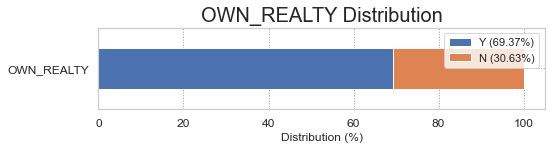

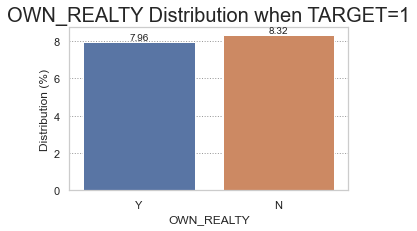

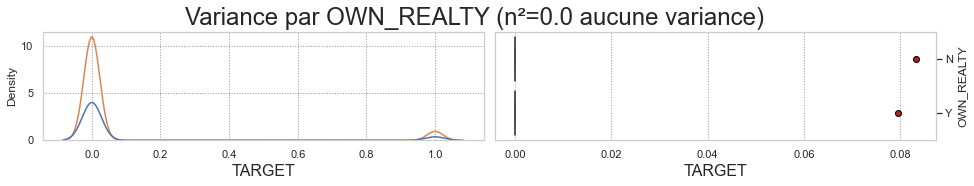

In [26]:
df = renameCol(df, 'FLAG_OWN_REALTY', 'OWN_REALTY')
print(nan_cols(pd.DataFrame(df['OWN_REALTY']))['#NaN'].values[0], '('+str(nan_cols(pd.DataFrame(df['OWN_REALTY']))['%NaN'].values[0])+'%) valeurs manquantes.')
plotBalance(df, ['OWN_REALTY'])
plotBalance(df, ['TARGET', 'OWN_REALTY', 'SK_ID_CURR'], mask=1, heigth=3, width=5)
ANOVA(df, 'OWN_REALTY', ['TARGET'], heigth=1, yloc=1.05)

#### Applicants have Phone ?

0 (0.0%) valeurs manquantes.


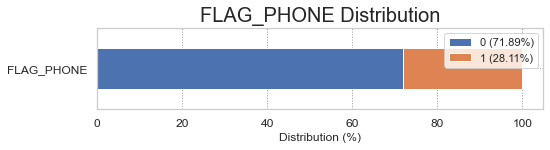

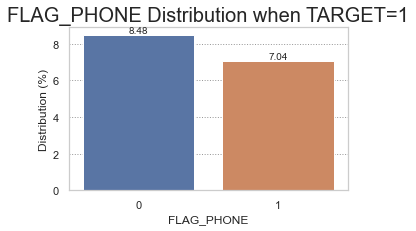

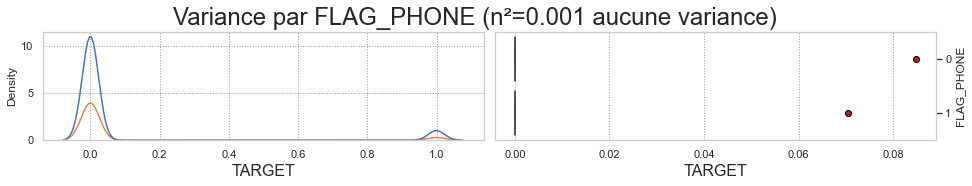

In [27]:
print(nan_cols(pd.DataFrame(df['FLAG_PHONE']))['#NaN'].values[0], '('+str(nan_cols(pd.DataFrame(df['FLAG_PHONE']))['%NaN'].values[0])+'%) valeurs manquantes.')
plotBalance(df, ['FLAG_PHONE'])
plotBalance(df, ['TARGET', 'FLAG_PHONE', 'SK_ID_CURR'], mask=1, heigth=3, width=5)
ANOVA(df, 'FLAG_PHONE', ['TARGET'], heigth=1, yloc=1.05)

#### Applicants have E-mail ?

0 (0.0%) valeurs manquantes.


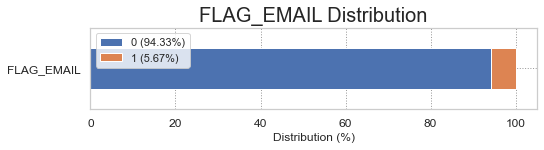

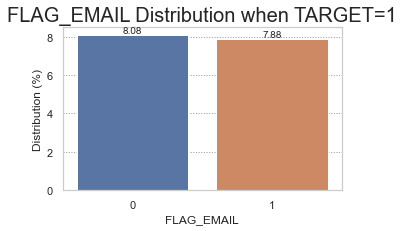

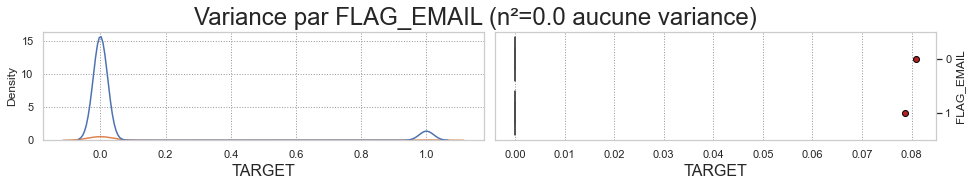

In [28]:
print(nan_cols(pd.DataFrame(df['FLAG_EMAIL']))['#NaN'].values[0], '('+str(nan_cols(pd.DataFrame(df['FLAG_EMAIL']))['%NaN'].values[0])+'%) valeurs manquantes.')
plotBalance(df, ['FLAG_EMAIL'])
plotBalance(df, ['TARGET', 'FLAG_EMAIL', 'SK_ID_CURR'], mask=1, heigth=3, width=5)
ANOVA(df, 'FLAG_EMAIL', ['TARGET'], heigth=1., yloc=1.05)

#### WEEKDAY_APPR_PROCESS_START

0 (0.0%) valeurs manquantes.


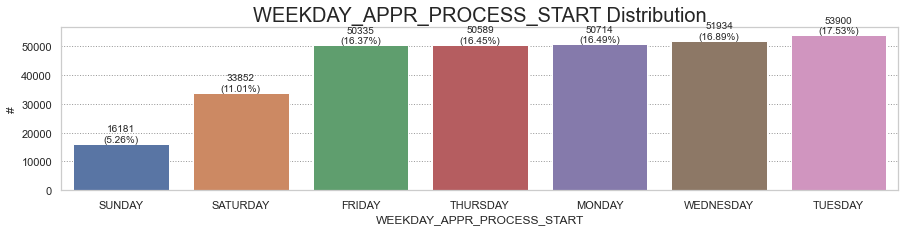

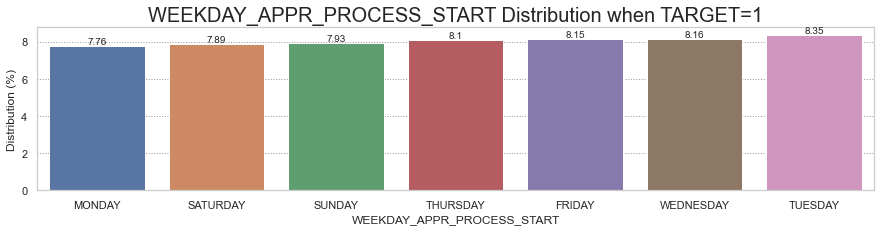

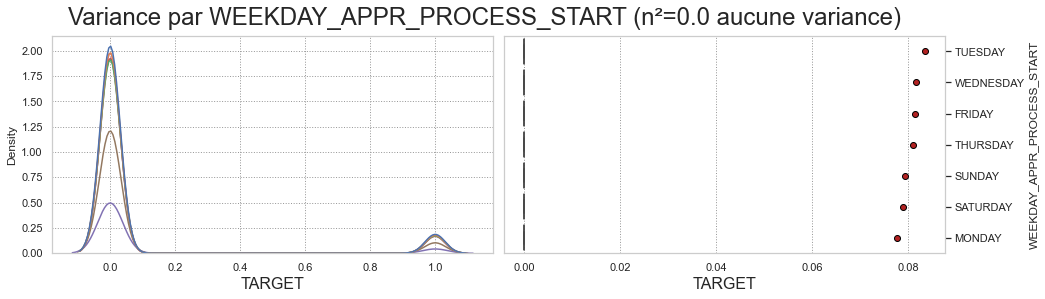

In [29]:
print(nan_cols(pd.DataFrame(df['WEEKDAY_APPR_PROCESS_START']))['#NaN'].values[0], '('+str(nan_cols(pd.DataFrame(df['WEEKDAY_APPR_PROCESS_START']))['%NaN'].values[0])+'%) valeurs manquantes.')
barplotDistribution(df['WEEKDAY_APPR_PROCESS_START'], heigth=3, width=15)
plotBalance(df, ['TARGET', 'WEEKDAY_APPR_PROCESS_START', 'SK_ID_CURR'], mask=1, heigth=3, width=15)
ANOVA(df, 'WEEKDAY_APPR_PROCESS_START', ['TARGET'], heigth=.7, yloc=.98)

Le taux de client avec des difficultés de paiement est le même quel que soit le jour de semaine pendant lequel le client a fait sa demande. Autrement dit, La jour de semaine de l’application n’aucun effet sur les possibles de difficultés de paiement (TARGET), on supprime donc cette variable inutile. 

In [30]:
df = df.drop(columns=['WEEKDAY_APPR_PROCESS_START'])

In [31]:
categorical_columns = colsOfType(df, ['object'])
print('Variables Catéorielles', categorical_columns)

Variables Catéorielles ['CONTRACT_TYPE', 'GENDER', 'OWN_CAR', 'OWN_REALTY', 'TYPE_SUITE', 'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_STATUS', 'HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


### Quantitative Variables

In [32]:
nan_columns = nan_cols(df,-1)[['Column','#NaN','%NaN']]
nan_columns

Column    #NaN   %NaN
0                COMMONAREA_MEDI  214861  69.87
1                 COMMONAREA_AVG  214861  69.87
2                COMMONAREA_MODE  214861  69.87
3       NONLIVINGAPARTMENTS_MODE  213511  69.43
4        NONLIVINGAPARTMENTS_AVG  213511  69.43
5       NONLIVINGAPARTMENTS_MEDI  213511  69.43
6           LIVINGAPARTMENTS_AVG  210196  68.36
7          LIVINGAPARTMENTS_MODE  210196  68.36
8          LIVINGAPARTMENTS_MEDI  210196  68.36
9                 FLOORSMIN_MEDI  208639  67.85
10                FLOORSMIN_MODE  208639  67.85
11                 FLOORSMIN_AVG  208639  67.85
12              YEARS_BUILD_MEDI  204485  66.50
13              YEARS_BUILD_MODE  204485  66.50
14               YEARS_BUILD_AVG  204485  66.50
15                   OWN_CAR_AGE  202925  65.99
16                 LANDAREA_MEDI  182586  59.38
17                  LANDAREA_AVG  182586  59.38
18                 LANDAREA_MODE  182586  59.38
19             BASEMENTAREA_MEDI  179941  58.52
20             BASEMENTAREA_MODE  179941  58.52
21              BASEMENTAREA_AVG  179941  58.52
22                  EXT_SOURCE_1  173375  56.38
23            NONLIVINGAREA_MEDI  169679  55.18
24             NONLIVINGAREA_AVG  169679  55.18
25            NONLIVINGAREA_MODE  169679  55.18
26                ELEVATORS_MEDI  163889  53.30
27                ELEVATORS_MODE  163889  53.30
28                 ELEVATORS_AVG  163889  53.30
29                APARTMENTS_AVG  156059  50.75
30               APARTMENTS_MEDI  156059  50.75
31               APARTMENTS_MODE  156059  50.75
32                 ENTRANCES_AVG  154826  50.35
33                ENTRANCES_MODE  154826  50.35
34                ENTRANCES_MEDI  154826  50.35
35               LIVINGAREA_MEDI  154348  50.19
36               LIVINGAREA_MODE  154348  50.19
37                LIVINGAREA_AVG  154348  50.19
38                FLOORSMAX_MEDI  153018  49.76
39                FLOORSMAX_MODE  153018  49.76
40                 FLOORSMAX_AVG  153018  49.76
41  YEARS_BEGINEXPLUATATION_MEDI  150005  48.78
42  YEARS_BEGINEXPLUATATION_MODE  150005  48.78
43   YEARS_BEGINEXPLUATATION_AVG  150005  48.78
44                TOTALAREA_MODE  148429  48.27
45                  EXT_SOURCE_3   60964  19.83
46    AMT_REQ_CREDIT_BUREAU_HOUR   41518  13.50
47     AMT_REQ_CREDIT_BUREAU_MON   41518  13.50
48     AMT_REQ_CREDIT_BUREAU_QRT   41518  13.50
49    AMT_REQ_CREDIT_BUREAU_WEEK   41518  13.50
50     AMT_REQ_CREDIT_BUREAU_DAY   41518  13.50
51    AMT_REQ_CREDIT_BUREAU_YEAR   41518  13.50
52      DEF_60_CNT_SOCIAL_CIRCLE    1021   0.33
53      OBS_60_CNT_SOCIAL_CIRCLE    1021   0.33
54      DEF_30_CNT_SOCIAL_CIRCLE    1021   0.33
55      OBS_30_CNT_SOCIAL_CIRCLE    1021   0.33
56                  EXT_SOURCE_2     660   0.21
57               AMT_GOODS_PRICE     276   0.09
58                   AMT_ANNUITY      12   0.00
59        DAYS_LAST_PHONE_CHANGE       1   0.00

In [33]:
nan_columns = nan_cols(df,40)[['Column','#NaN','%NaN']]
nan_columns = nan_columns['Column'].tolist()
nan_columns.remove('EXT_SOURCE_1')
print('Variables à éliminer:', nan_columns)
df = df.drop(columns=nan_columns)

Variables à éliminer: ['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MODE', 'OWN_CAR_AGE', 'LANDAREA_MODE', 'LANDAREA_MEDI', 'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'ELEVATORS_AVG', 'APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE']


In [34]:
df[colsOfType(df)].describe()

SK_ID_CURR         TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307505.000000  307505.000000  307505.00000      3.075050e+05   
mean   278181.821811       0.080730       0.41705      1.687967e+05   
std    102790.177600       0.272421       0.72212      2.371248e+05   
min    100002.000000       0.000000       0.00000      2.565000e+04   
25%    189147.000000       0.000000       0.00000      1.125000e+05   
50%    278203.000000       0.000000       0.00000      1.471500e+05   
75%    367144.000000       0.000000       1.00000      2.025000e+05   
max    456255.000000       1.000000      19.00000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075050e+05  307493.000000     3.072290e+05   
mean   5.990284e+05   27108.638224     5.383977e+05   
std    4.024939e+05   14493.840051     3.694472e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307505.000000  307505.000000  307505.000000   
mean                     0.020868  -16037.049495   63816.348794   
std                      0.013831    4363.987877  141276.836143   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  \
count      307505.000000    307505.000000  307505.000000   307505.000000   
mean        -4986.147994     -2994.201437       0.999997        0.819886   
std          3522.887818      1509.454886       0.001803        0.384283   
min        -24672.000000     -7197.000000       0.000000        0.000000   
25%         -7480.000000     -4299.000000       1.000000        1.000000   
50%         -4504.000000     -3254.000000       1.000000        1.000000   
75%         -2010.000000     -1720.000000       1.000000        1.000000   
max             0.000000         0.000000       1.000000        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    307505.000000     307505.000000  307505.000000  307505.000000   
mean          0.199356          0.998133       0.281056       0.056721   
std           0.399517          0.043164       0.449515       0.231309   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    307505.000000         307505.000000                307505.000000   
mean          2.152658              2.052461                     2.031518   
std           0.910680              0.509036                     0.502739   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307505.000000               307505.000000   
mean                 12.063378                    0.015144   
std                   3.265840        

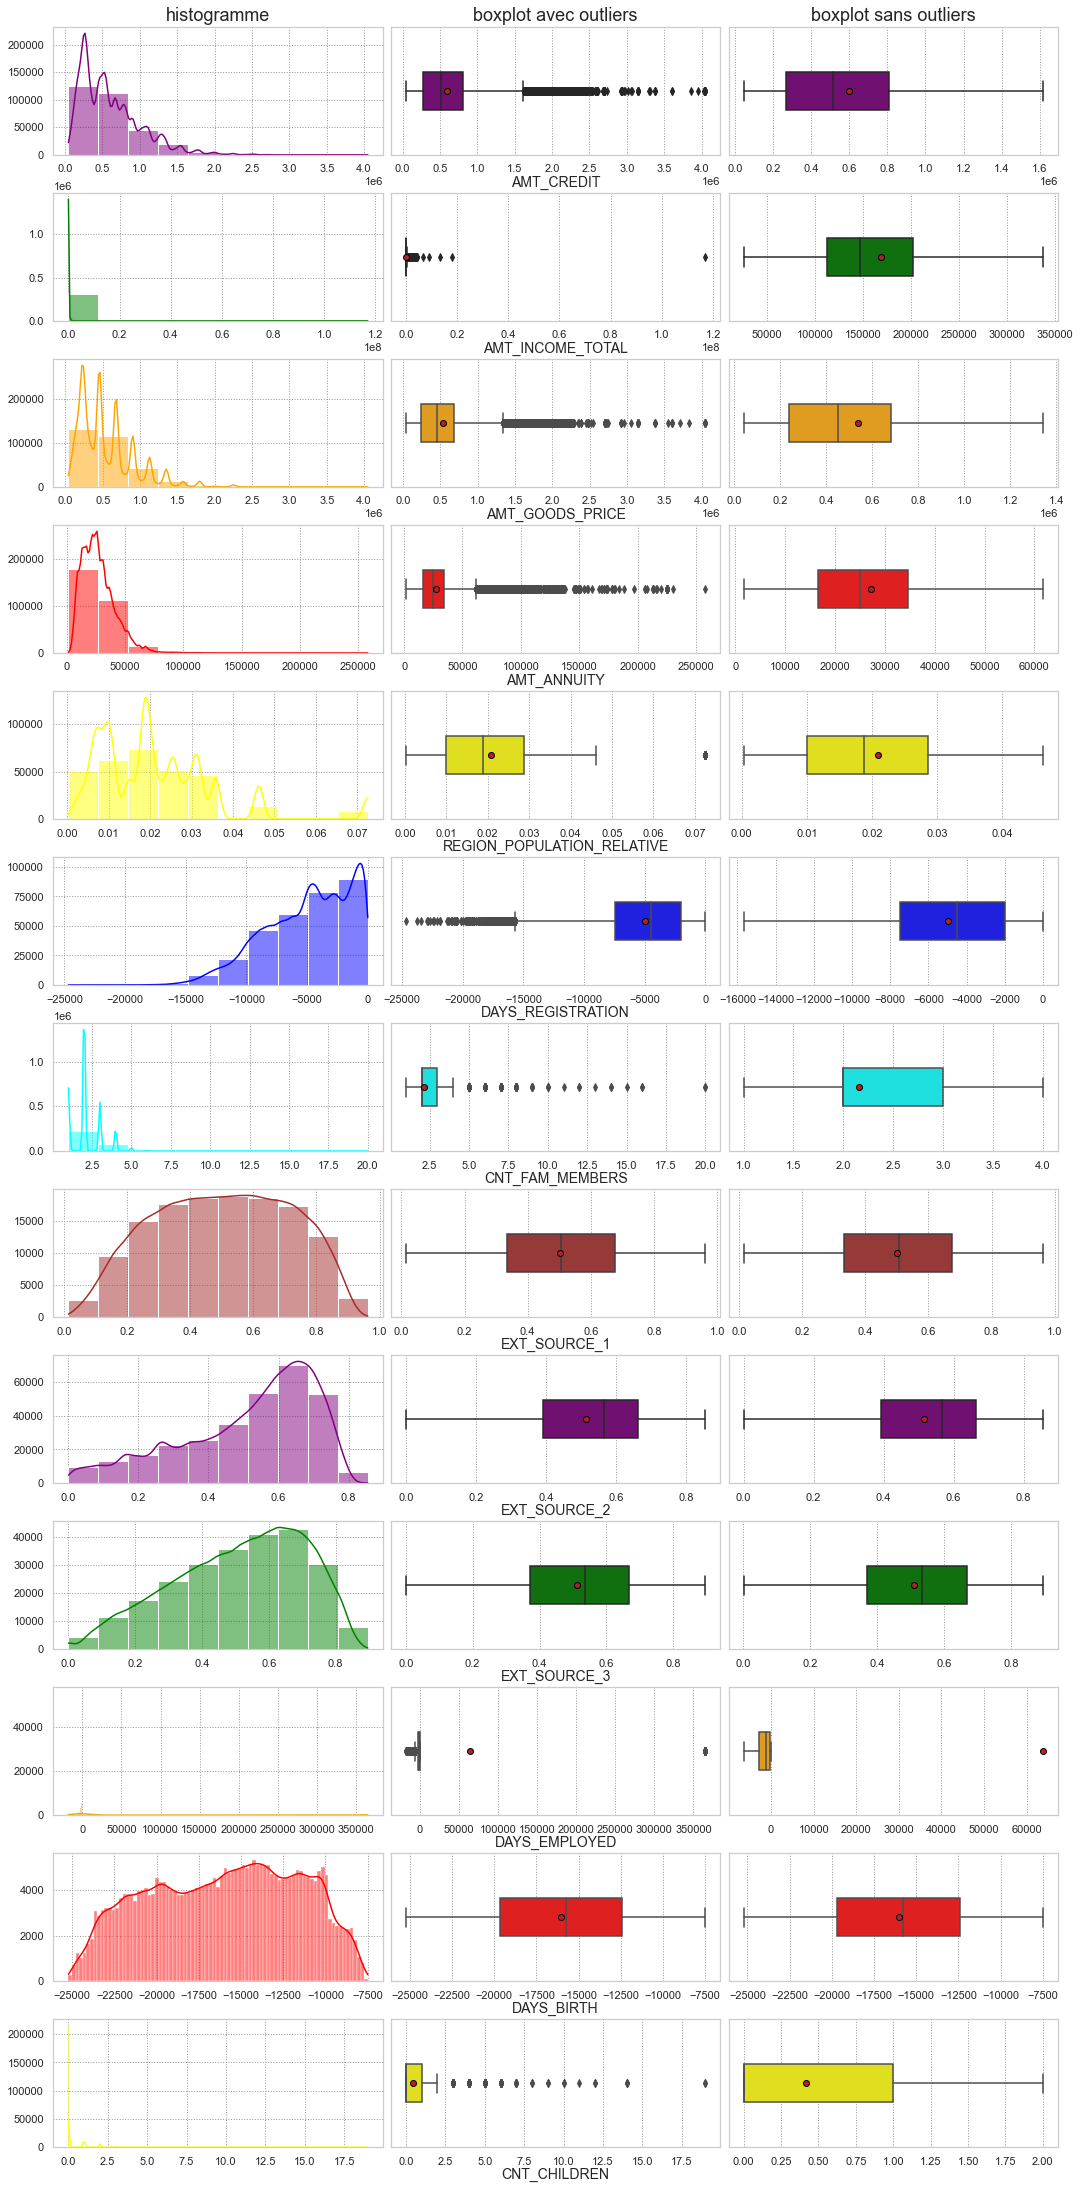

In [35]:
histo_distribution(df[['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']])

#### <a id='5-2'>Amount Income Total</a>

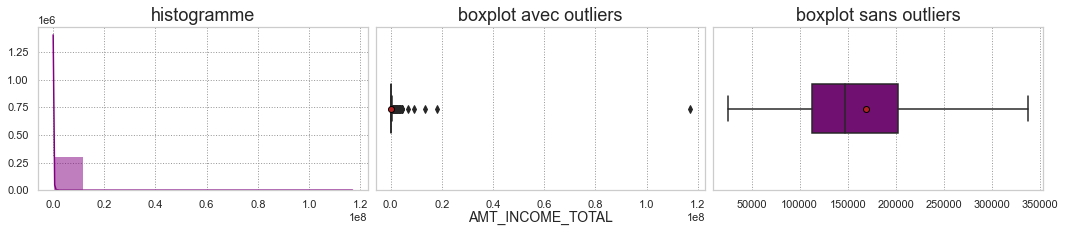

In [36]:
histo_distribution(pd.DataFrame(df['AMT_INCOME_TOTAL']))

In [37]:
df["AMT_INCOME_TOTAL"].dropna().describe()

count    3.075050e+05
mean     1.687967e+05
std      2.371248e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [38]:
df[df["AMT_INCOME_TOTAL"]>1e+07]

SK_ID_CURR  TARGET CONTRACT_TYPE GENDER OWN_CAR OWN_REALTY  \
12840       114967       1    Cash loans      F       N          Y   
203693      336147       0    Cash loans      M       Y          Y   
246858      385674       0    Cash loans      M       Y          Y   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
12840              1       117000000.0    562491.0      26194.5   
203693             2        18000090.0    675000.0      69295.5   
246858             0        13500000.0   1400503.5     130945.5   

        AMT_GOODS_PRICE     TYPE_SUITE           INCOME_TYPE  \
12840          454500.0  Unaccompanied               Working   
203693         675000.0  Unaccompanied  Commercial associate   
246858        1368000.0  Unaccompanied  Commercial associate   

                       EDUCATION_TYPE FAMILY_STATUS       HOUSING_TYPE  \
12840   Secondary / secondary special       Married  House / apartment   
203693  Secondary / secondary special       Married  House / apartment   
246858               Higher education       Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
12840                     0.010643      -12615           -922   
203693                    0.030755      -15704          -4961   
246858                    0.030755      -13551           -280   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
12840             -6762.0            -3643           1               1   
203693            -3338.0            -4728           1               1   
246858            -3953.0            -4972           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
12840                 0                 1           0           0   
203693                0                 1           0           0   
246858                1                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
12840         Laborers              3.0                     2   
203693         Unknwon              4.0                     2   
246858         Unknwon              2.0                     2   

        REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
12840                             2                       14   
203693                            2                       22   
246858                            2                       12   

        REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
12840                            0                           0   
203693                           0                           0   
246858                           0                           0   

        LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
12840                             0                       0   
203693                            0                       0   
246858                            0                       0   

        REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
12840                        0                        0   
203693                       0                        0   
246858                       0                        0   

             ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
12840   Business Entity Type 3      0.460809      0.113161      0.145543   
203693  Business Entity Type 3      0.543417      0.788606           NaN   
246858  Business Entity Type 3           NaN      0.713507           NaN   

       FONDKAPREMONT_MODE  HOUSETYPE_MODE WALLSMATERIAL_MODE  \
12840             Unknwon  block of flats       Stone, brick   
203693            Unknwon         Unknwon            Unknwon   
246858            Unknwon         Unknwon            Unknwon   

       EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
12840                   No                       0.0   
203693             Unknwon                       1.0   
246858             Unknwon                       0.0   

        D

In [39]:
df.loc[df['AMT_INCOME_TOTAL']==df['AMT_INCOME_TOTAL'].max(), 'AMT_INCOME_TOTAL'] = df['AMT_INCOME_TOTAL'].max()/10
df[df['AMT_INCOME_TOTAL']==df['AMT_INCOME_TOTAL'].max()]

SK_ID_CURR  TARGET CONTRACT_TYPE GENDER OWN_CAR OWN_REALTY  \
203693      336147       0    Cash loans      M       Y          Y   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
203693             2        18000090.0    675000.0      69295.5   

        AMT_GOODS_PRICE     TYPE_SUITE           INCOME_TYPE  \
203693         675000.0  Unaccompanied  Commercial associate   

                       EDUCATION_TYPE FAMILY_STATUS       HOUSING_TYPE  \
203693  Secondary / secondary special       Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
203693                    0.030755      -15704          -4961   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
203693            -3338.0            -4728           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
203693                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
203693         Unknwon              4.0                     2   

        REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
203693                            2                       22   

        REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
203693                           0                           0   

        LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
203693                            0                       0   

        REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
203693                       0                        0   

             ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
203693  Business Entity Type 3      0.543417      0.788606           NaN   

       FONDKAPREMONT_MODE HOUSETYPE_MODE WALLSMATERIAL_MODE  \
203693            Unknwon        Unknwon            Unknwon   

       EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
203693             Unknwon                       1.0   

        DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
203693                       0.0                       1.0   

        DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
203693                       0.0                 -1133.0                0   

        FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
203693                1                0                0                0   

        FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
203693                0                0                0                 0   

        FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
203693                 0                 0                 0   

        FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  \
203693                 0                 0                 0   

        FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
203693                 0                 0                 0   

        FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
203693                 0                 0                         NaN   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
203693                        NaN                         NaN   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
203693                        NaN                        NaN   

        AMT_REQ_CREDIT_BUREAU_YEAR  
203693                         NaN

In [40]:
df[df["AMT_INCOME_TOTAL"]>1e+07]

SK_ID_CURR  TARGET CONTRACT_TYPE GENDER OWN_CAR OWN_REALTY  \
12840       114967       1    Cash loans      F       N          Y   
203693      336147       0    Cash loans      M       Y          Y   
246858      385674       0    Cash loans      M       Y          Y   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
12840              1        11700000.0    562491.0      26194.5   
203693             2        18000090.0    675000.0      69295.5   
246858             0        13500000.0   1400503.5     130945.5   

        AMT_GOODS_PRICE     TYPE_SUITE           INCOME_TYPE  \
12840          454500.0  Unaccompanied               Working   
203693         675000.0  Unaccompanied  Commercial associate   
246858        1368000.0  Unaccompanied  Commercial associate   

                       EDUCATION_TYPE FAMILY_STATUS       HOUSING_TYPE  \
12840   Secondary / secondary special       Married  House / apartment   
203693  Secondary / secondary special       Married  House / apartment   
246858               Higher education       Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
12840                     0.010643      -12615           -922   
203693                    0.030755      -15704          -4961   
246858                    0.030755      -13551           -280   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
12840             -6762.0            -3643           1               1   
203693            -3338.0            -4728           1               1   
246858            -3953.0            -4972           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
12840                 0                 1           0           0   
203693                0                 1           0           0   
246858                1                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
12840         Laborers              3.0                     2   
203693         Unknwon              4.0                     2   
246858         Unknwon              2.0                     2   

        REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
12840                             2                       14   
203693                            2                       22   
246858                            2                       12   

        REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
12840                            0                           0   
203693                           0                           0   
246858                           0                           0   

        LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
12840                             0                       0   
203693                            0                       0   
246858                            0                       0   

        REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
12840                        0                        0   
203693                       0                        0   
246858                       0                        0   

             ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
12840   Business Entity Type 3      0.460809      0.113161      0.145543   
203693  Business Entity Type 3      0.543417      0.788606           NaN   
246858  Business Entity Type 3           NaN      0.713507           NaN   

       FONDKAPREMONT_MODE  HOUSETYPE_MODE WALLSMATERIAL_MODE  \
12840             Unknwon  block of flats       Stone, brick   
203693            Unknwon         Unknwon            Unknwon   
246858            Unknwon         Unknwon            Unknwon   

       EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
12840                   No                       0.0   
203693             Unknwon                       1.0   
246858             Unknwon                       0.0   

        D

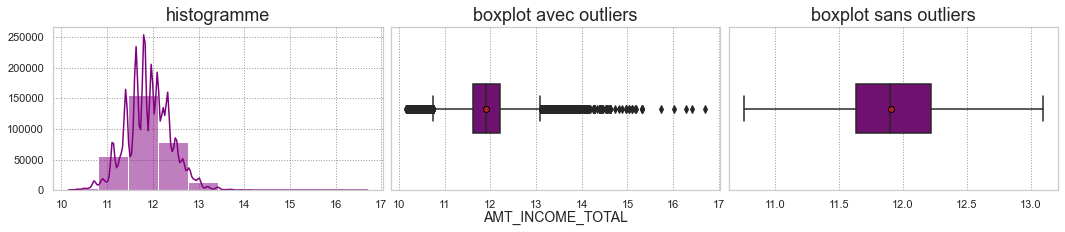

In [41]:
histo_distribution(np.log(pd.DataFrame(df['AMT_INCOME_TOTAL'])))

#### <a id='5-2'>Days Employed</a>

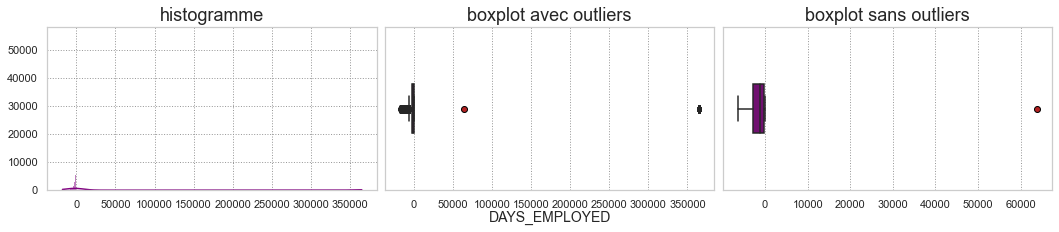

In [42]:
histo_distribution(pd.DataFrame(df['DAYS_EMPLOYED']))

In [43]:
df["DAYS_EMPLOYED"].dropna().describe()

count    307505.000000
mean      63816.348794
std      141276.836143
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [44]:
df[df['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED'].unique()

array([365243], dtype=int64)

In [45]:
df.loc[df['DAYS_EMPLOYED'] > 0,'DAYS_EMPLOYED']=np.nan

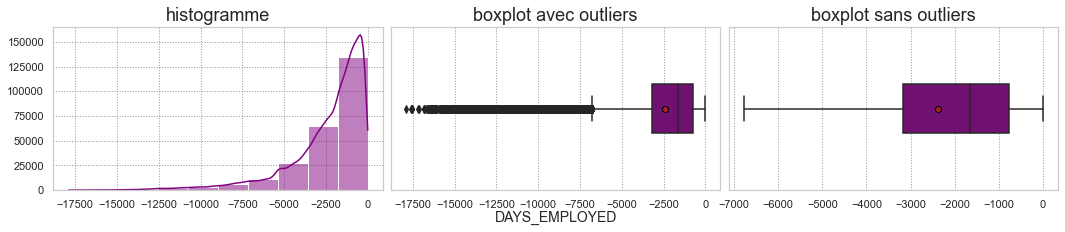

In [46]:
histo_distribution(pd.DataFrame(df['DAYS_EMPLOYED']))

In [47]:
df["DAYS_EMPLOYED"].dropna().describe()

count    252131.000000
mean      -2384.155641
std        2338.331744
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

#### Missing Data

Le data set contient :
	- 307505 lignes et 77 colonnes.
	- 543854 valeurs manquantes, ce qui représente 2.3 % du data set.


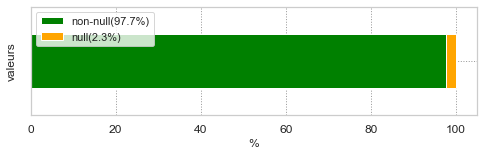

Voici les colonnes avec NaNs:


0             1              2   \
Column    EXT_SOURCE_1  EXT_SOURCE_3  DAYS_EMPLOYED   
#NaN            173375         60964          55374   
%NaN             56.38         19.83          18.01   
#Not_NaN        134130        246541         252131   
%Not_NaN         43.62         80.17          81.99   

                                  3                           4   \
Column    AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_HOUR   
#NaN                           41518                       41518   
%NaN                            13.5                        13.5   
#Not_NaN                      265987                      265987   
%Not_NaN                        86.5                        86.5   

                                 5                          6   \
Column    AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_MON   
#NaN                          41518                      41518   
%NaN                           13.5                       13.5   
#Not_NaN                     265987                     265987   
%Not_NaN                       86.5                       86.5   

                                  7                          8   \
Column    AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_DAY   
#NaN                           41518                      41518   
%NaN                            13.5                       13.5   
#Not_NaN                      265987                     265987   
%Not_NaN                        86.5                       86.5   

                                9                         10  \
Column    OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE   
#NaN                          1021                      1021   
%NaN                          0.33                      0.33   
#Not_NaN                    306484                    306484   
%Not_NaN                     99.67                     99.67   

                                11                        12            13  \
Column    DEF_30_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE  EXT_SOURCE_2   
#NaN                          1021                      1021           660   
%NaN                          0.33                      0.33          0.21   
#Not_NaN                    306484                    306484        306845   
%Not_NaN                     99.67                     99.67         99.79   

                       14           15                      16  
Column    AMT_GOODS_PRICE  AMT_ANNUITY  DAYS_LAST_PHONE_CHANGE  
#NaN                  276           12                       1  
%NaN                 0.09          0.0                     0.0  
#Not_NaN           307229       307493                  307504  
%Not_NaN            99.91        100.0                   100.0

In [48]:
verifier_taille(df)

In [49]:
# from sklearn.impute import KNNImputer
# scaled_data, scaler = Std_Scaled(df, frame=True, return_scaler=True)
# knn_imputer = KNNImputer(n_neighbors=100, weights='distance')
# knn_imputer_transfom = knn_imputer.fit_transform(scaled_data)
# knn_imputed_data = pd.DataFrame(scaler.inverse_transform(knn_imputer_transfom), columns = scaled_data.columns, index=scaled_data.index)

Le data set contient :
	- 307505 lignes et 77 colonnes.
	- 0 valeurs manquantes, ce qui représente 0.0 % du data set.


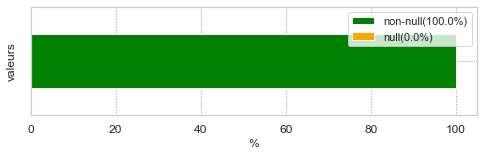

In [50]:
df = SimpleImputation(df)
verifier_taille(df)

In [51]:
dfs['application_train'] = df

## <a id='5-15'>Previous Application Data</a>

Le data set contient :
	- 1670214 lignes et 37 colonnes.
	- 11109336 valeurs manquantes, ce qui représente 17.98 % du data set.


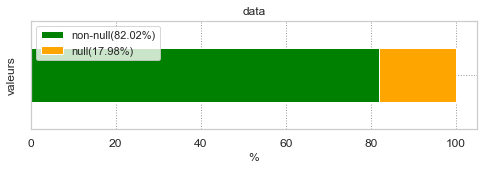

Voici les colonnes avec NaNs:


0                         1                 2   \
Column    RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  AMT_DOWN_PAYMENT   
#NaN                    1664263                   1664263            895844   
%NaN                      99.64                     99.64             53.64   
#Not_NaN                   5951                      5951            774370   
%Not_NaN                   0.36                      0.36             46.36   

                         3                4                   5   \
Column    RATE_DOWN_PAYMENT  NAME_TYPE_SUITE  DAYS_FIRST_DRAWING   
#NaN                 895844           820405              673065   
%NaN                  53.64            49.12                40.3   
#Not_NaN             774370           849809              997149   
%Not_NaN              46.36            50.88                59.7   

                      6                          7              8   \
Column    DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE   
#NaN              673065                     673065         673065   
%NaN                40.3                       40.3           40.3   
#Not_NaN          997149                     997149         997149   
%Not_NaN            59.7                       59.7           59.7   

                        9                          10               11  \
Column    DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  AMT_GOODS_PRICE   
#NaN                673065                     673065           385515   
%NaN                  40.3                       40.3            23.08   
#Not_NaN            997149                     997149          1284699   
%Not_NaN              59.7                       59.7            76.92   

                   12           13                   14          15  
Column    AMT_ANNUITY  CNT_PAYMENT  PRODUCT_COMBINATION  AMT_CREDIT  
#NaN           372235       372230                  346           1  
%NaN            22.29        22.29                 0.02         0.0  
#Not_NaN      1297979      1297984              1669868     1670213  
%Not_NaN        77.71        77.71                99.98       100.0

Voici un sous-échantillon aléatoire :


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
1060084     1373698      224382     Consumer loans     4303.845   
1039390     2726374      321559    Revolving loans     9000.000   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
1060084          41980.5     41980.5               0.0          41980.5   
1039390              0.0    180000.0               NaN              NaN   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1060084                     SUNDAY                       11   
1039390                     MONDAY                       11   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
1060084                           Y                       1   
1039390                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
1060084                0.0                    NaN                       NaN   
1039390                NaN                    NaN                       NaN   

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
1060084                    XAP             Approved           -522   
1039390                    XAP             Approved          -1168   

             NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE  \
1060084  Cash through the bank                XAP             NaN   
1039390                    XNA                XAP             NaN   

        NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
1060084              New         Audio/Video            POS               XNA   
1039390         Repeater                 XNA          Cards            x-sell   

                    CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  \
1060084                    Stone                50  Consumer electronics   
1039390  Credit and cash offices                -1                   XNA   

         CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION  \
1060084         12.0           middle  POS household with interest   
1039390          0.0              XNA                  Card X-Sell   

         DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
1060084            365243.0          -490.0                     -160.0   
1039390             -1155.0         -1114.0                   365243.0   

         DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
1060084         -340.0            -333.0                        0.0  
1039390       365243.0          365243.0                        0.0

Doublons: 0


In [52]:
df = dfs['previous_application']
verifier_taille(df, name)
afficher_echantillon(df)
print('Doublons:', len(doublons(df[df.columns[0]])))

### Categorical Data

#### Missing Data

Column    #NaN   %NaN  #Not_NaN  %Not_NaN
0      NAME_TYPE_SUITE  820405  49.12    849809     50.88
1  PRODUCT_COMBINATION     346   0.02   1669868     99.98

Le data set contient :
	- 1670214 lignes et 37 colonnes.
	- 10288585 valeurs manquantes, ce qui représente 16.65 % du data set.


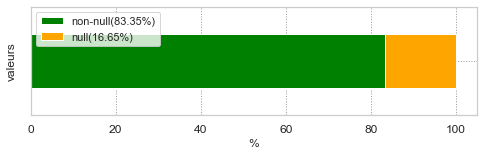

Voici les colonnes avec NaNs:


0                         1                 2   \
Column    RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  AMT_DOWN_PAYMENT   
#NaN                    1664263                   1664263            895844   
%NaN                      99.64                     99.64             53.64   
#Not_NaN                   5951                      5951            774370   
%Not_NaN                   0.36                      0.36             46.36   

                         3                   4               5   \
Column    RATE_DOWN_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE   
#NaN                 895844              673065          673065   
%NaN                  53.64                40.3            40.3   
#Not_NaN             774370              997149          997149   
%Not_NaN              46.36                59.7            59.7   

                                 6              7                 8   \
Column    DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION   
#NaN                         673065         673065            673065   
%NaN                           40.3           40.3              40.3   
#Not_NaN                     997149         997149            997149   
%Not_NaN                       59.7           59.7              59.7   

                                 9                10           11  \
Column    NFLAG_INSURED_ON_APPROVAL  AMT_GOODS_PRICE  AMT_ANNUITY   
#NaN                         673065           385515       372235   
%NaN                           40.3            23.08        22.29   
#Not_NaN                     997149          1284699      1297979   
%Not_NaN                       59.7            76.92        77.71   

                   12          13  
Column    CNT_PAYMENT  AMT_CREDIT  
#NaN           372230           1  
%NaN            22.29         0.0  
#Not_NaN      1297984     1670213  
%Not_NaN        77.71       100.0

In [53]:
categorical_columns = colsOfType(df, 'object')
categ_nan_cols = nan_cols(df[categorical_columns], -1)
display(categ_nan_cols)
categ_nan_cols_list = categ_nan_cols['Column'].tolist()
df[categ_nan_cols_list]=df[categ_nan_cols_list].replace(np.nan,'Unknwon')
verifier_taille(df)

#### Client Type

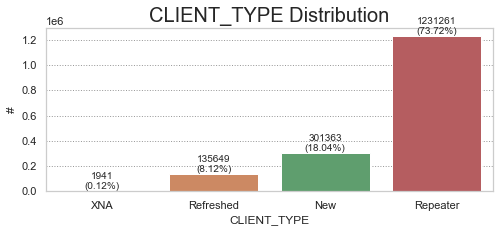

In [54]:
df = renameCol(df, 'NAME_CLIENT_TYPE', 'CLIENT_TYPE')
barplotDistribution(df['CLIENT_TYPE'], heigth=3, width=8, percent=True)

#### Contract Status

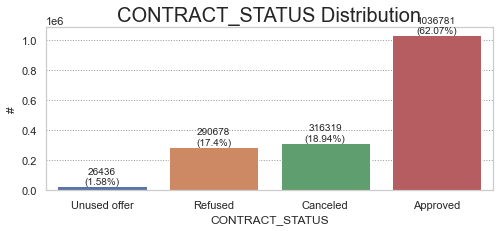

In [55]:
df = renameCol(df, 'NAME_CONTRACT_STATUS', 'CONTRACT_STATUS')
barplotDistribution(df['CONTRACT_STATUS'], heigth=3, width=8, percent=True)

### <a id='5-15-1'> Contract product type</a>

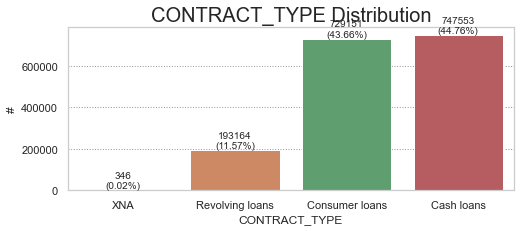

In [56]:
df = renameCol(df, 'NAME_CONTRACT_TYPE', 'CONTRACT_TYPE')
barplotDistribution(df['CONTRACT_TYPE'], heigth=3, width=8, percent=True)

#### <a id='5-15-6'> Why was the previous application rejected ?</a>

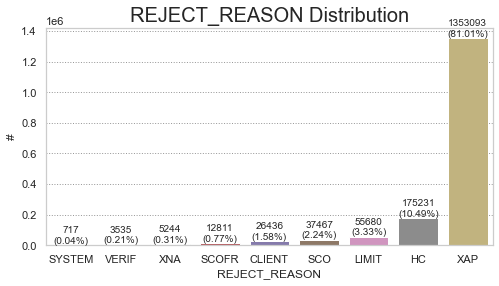

In [57]:
df = renameCol(df, 'CODE_REJECT_REASON', 'REJECT_REASON')
barplotDistribution(df['REJECT_REASON'], heigth=4, width=8, percent=True)

#### On which day of the week did the clients apply for previous application

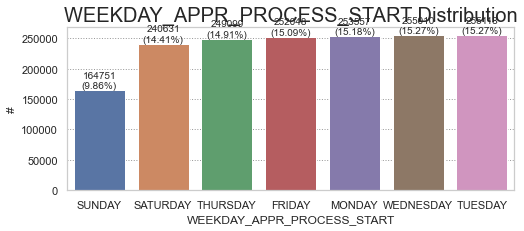

In [58]:
barplotDistribution(df['WEEKDAY_APPR_PROCESS_START'], heigth=3, width=8, percent=True)

#### Purpose of Cash Loan

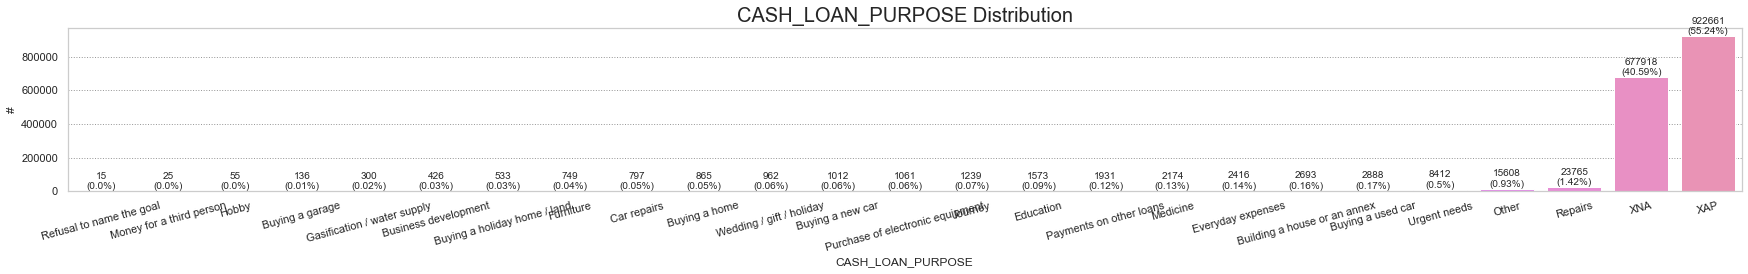

In [59]:
df = renameCol(df, 'NAME_CASH_LOAN_PURPOSE', 'CASH_LOAN_PURPOSE')
barplotDistribution(df['CASH_LOAN_PURPOSE'], heigth=3, width=30, percent=True, rotation=15)

#### Payment method

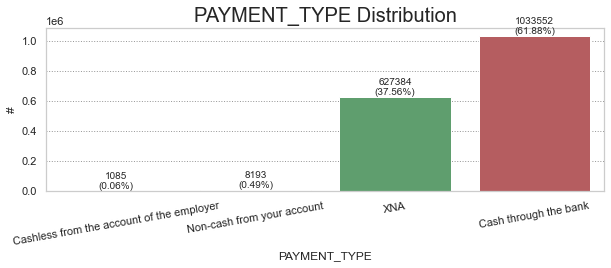

In [60]:
df = renameCol(df, 'NAME_PAYMENT_TYPE', 'PAYMENT_TYPE')
barplotDistribution(df['PAYMENT_TYPE'], heigth=3, percent=True, rotation=10)

#### Who accompanied the clients when applying for the previous application

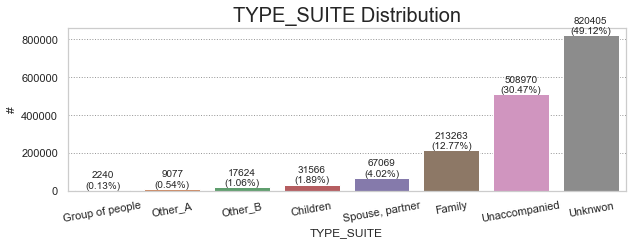

In [61]:
df = renameCol(df, 'NAME_TYPE_SUITE', 'TYPE_SUITE')
barplotDistribution(df['TYPE_SUITE'], heigth=3, percent=True, rotation=10)

#### What kind of goods did the clients apply for in the previous application

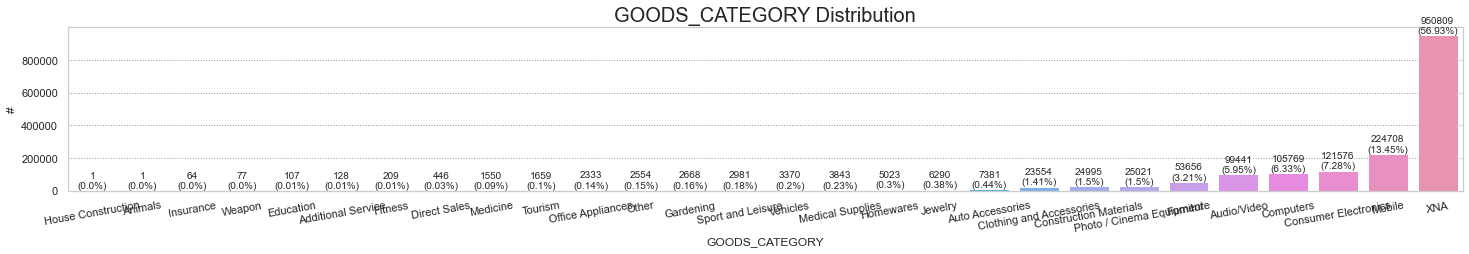

In [62]:
df = renameCol(df, 'NAME_GOODS_CATEGORY', 'GOODS_CATEGORY')
barplotDistribution(df['GOODS_CATEGORY'], heigth=3, width=25, percent=True, rotation=10)

the goods category of more than the half of applications is unkown. Therefore, this variable is non-informative => drop.

In [63]:
df = df.drop(columns='GOODS_CATEGORY')

#### Was the previous application for CASH, POS, CAR, …

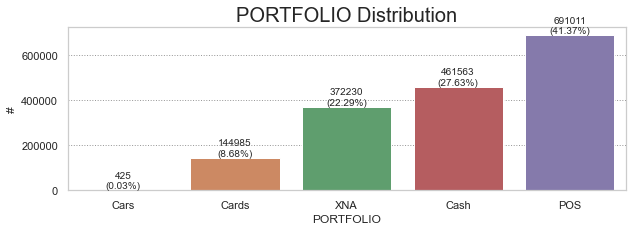

In [64]:
df = renameCol(df, 'NAME_PORTFOLIO', 'PORTFOLIO')
barplotDistribution(df['PORTFOLIO'], heigth=3, percent=True)

#### Top channels through which they acquired the clients on the previous application

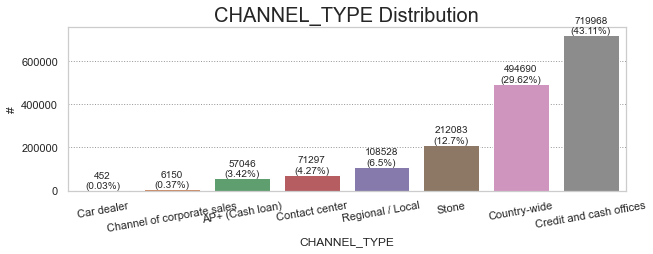

In [65]:
barplotDistribution(df['CHANNEL_TYPE'], heigth=3, percent=True, rotation=10)

#### Top industry of the seller

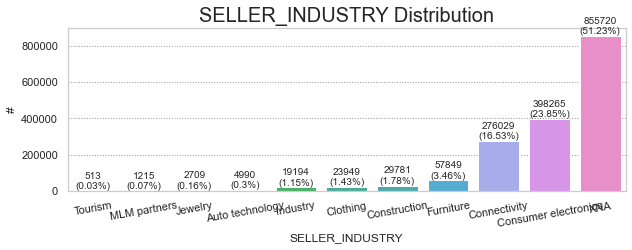

In [66]:
df = renameCol(df, 'NAME_SELLER_INDUSTRY', 'SELLER_INDUSTRY')
barplotDistribution(df['SELLER_INDUSTRY'], heigth=3, percent=True, rotation=10)

#### Grouped interest rate into small medium and high of the previous application

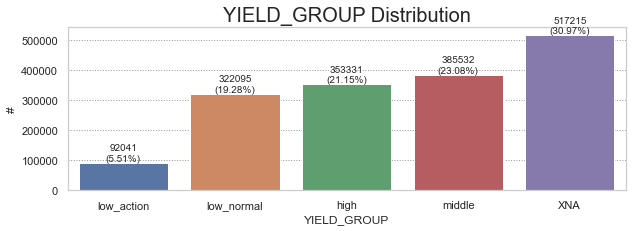

In [67]:
df = renameCol(df, 'NAME_YIELD_GROUP', 'YIELD_GROUP')
barplotDistribution(df['YIELD_GROUP'], heigth=3, percent=True)

#### Did the clients requested insurance during the previous application?

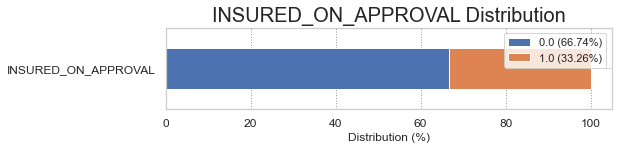

In [68]:
df = renameCol(df, 'NFLAG_INSURED_ON_APPROVAL', 'INSURED_ON_APPROVAL')
plotBalance(df, ['INSURED_ON_APPROVAL'])

### Missing Data

Le data set contient :
	- 1670214 lignes et 36 colonnes.
	- 10288585 valeurs manquantes, ce qui représente 17.11 % du data set.


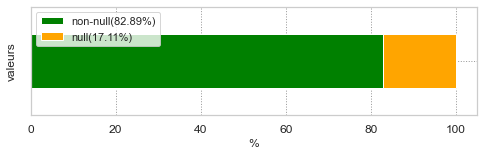

Voici les colonnes avec NaNs:


0                         1                 2   \
Column    RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  AMT_DOWN_PAYMENT   
#NaN                    1664263                   1664263            895844   
%NaN                      99.64                     99.64             53.64   
#Not_NaN                   5951                      5951            774370   
%Not_NaN                   0.36                      0.36             46.36   

                         3                   4               5   \
Column    RATE_DOWN_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE   
#NaN                 895844              673065          673065   
%NaN                  53.64                40.3            40.3   
#Not_NaN             774370              997149          997149   
%Not_NaN              46.36                59.7            59.7   

                                 6              7                 8   \
Column    DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION   
#NaN                         673065         673065            673065   
%NaN                           40.3           40.3              40.3   
#Not_NaN                     997149         997149            997149   
%Not_NaN                       59.7           59.7              59.7   

                           9                10           11           12  \
Column    INSURED_ON_APPROVAL  AMT_GOODS_PRICE  AMT_ANNUITY  CNT_PAYMENT   
#NaN                   673065           385515       372235       372230   
%NaN                     40.3            23.08        22.29        22.29   
#Not_NaN               997149          1284699      1297979      1297984   
%Not_NaN                 59.7            76.92        77.71        77.71   

                  13  
Column    AMT_CREDIT  
#NaN               1  
%NaN             0.0  
#Not_NaN     1670213  
%Not_NaN       100.0

In [69]:
verifier_taille(df)

Le data set contient :
	- 1670214 lignes et 34 colonnes.
	- 6960059 valeurs manquantes, ce qui représente 12.26 % du data set.


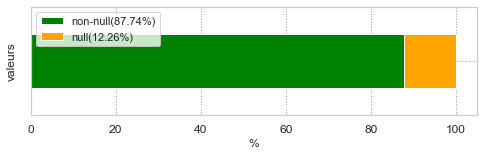

Voici les colonnes avec NaNs:


0                  1                   2   \
Column    AMT_DOWN_PAYMENT  RATE_DOWN_PAYMENT  DAYS_FIRST_DRAWING   
#NaN                895844             895844              673065   
%NaN                 53.64              53.64                40.3   
#Not_NaN            774370             774370              997149   
%Not_NaN             46.36              46.36                59.7   

                      3                          4              5   \
Column    DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE   
#NaN              673065                     673065         673065   
%NaN                40.3                       40.3           40.3   
#Not_NaN          997149                     997149         997149   
%Not_NaN            59.7                       59.7           59.7   

                        6                    7                8            9   \
Column    DAYS_TERMINATION  INSURED_ON_APPROVAL  AMT_GOODS_PRICE  AMT_ANNUITY   
#NaN                673065               673065           385515       372235   
%NaN                  40.3                 40.3            23.08        22.29   
#Not_NaN            997149               997149          1284699      1297979   
%Not_NaN              59.7                 59.7            76.92        77.71   

                   10          11  
Column    CNT_PAYMENT  AMT_CREDIT  
#NaN           372230           1  
%NaN            22.29         0.0  
#Not_NaN      1297984     1670213  
%Not_NaN        77.71       100.0

In [70]:
nan_cols_list = nan_cols(df, 90)['Column'].tolist()
df.drop(columns=nan_cols_list, inplace=True)
verifier_taille(df)

Le data set contient :
	- 1670214 lignes et 34 colonnes.
	- 0 valeurs manquantes, ce qui représente 0.0 % du data set.


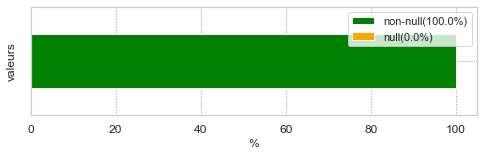

In [71]:
df = SimpleImputation(df)
verifier_taille(df)

In [72]:
dfs['previous_application'] = df

## <a id='5-15'>Bureau</a>

Le data set contient :
	- 1716428 lignes et 17 colonnes.
	- 3939947 valeurs manquantes, ce qui représente 13.5 % du data set.


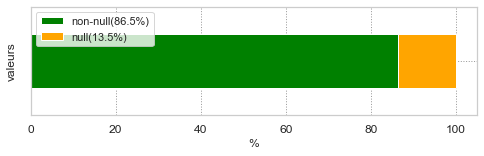

Voici les colonnes avec NaNs:


0                       1                  2  \
Column    AMT_ANNUITY  AMT_CREDIT_MAX_OVERDUE  DAYS_ENDDATE_FACT   
#NaN          1226791                 1124488             633653   
%NaN            71.47                   65.51              36.92   
#Not_NaN       489637                  591940            1082775   
%Not_NaN        28.53                   34.49              63.08   

                             3                    4                    5  \
Column    AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_DEBT  DAYS_CREDIT_ENDDATE   
#NaN                    591780               257669               105553   
%NaN                     34.48                15.01                 6.15   
#Not_NaN               1124648              1458759              1610875   
%Not_NaN                 65.52                84.99                93.85   

                       6  
Column    AMT_CREDIT_SUM  
#NaN                  13  
%NaN                 0.0  
#Not_NaN         1716415  
%Not_NaN           100.0

In [73]:
df = dfs['bureau']
verifier_taille(df)

Le data set contient :
	- 1716428 lignes et 17 colonnes.
	- 0 valeurs manquantes, ce qui représente 0.0 % du data set.


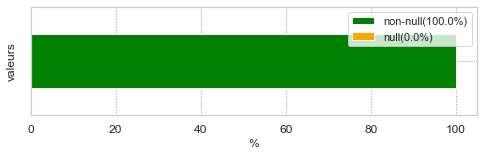

In [74]:
df = SimpleImputation(df)
verifier_taille(df)

In [75]:
dfs['bureau'] = df

## <a id='5-15'>Credit Card Balance</a>

Le data set contient :
	- 3840312 lignes et 23 colonnes.
	- 5877356 valeurs manquantes, ce qui représente 6.65 % du data set.


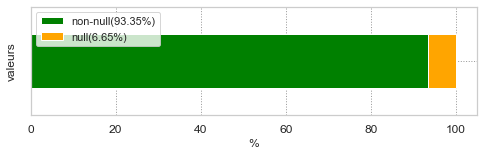

Voici les colonnes avec NaNs:


0                         1  \
Column    AMT_PAYMENT_CURRENT  AMT_DRAWINGS_ATM_CURRENT   
#NaN                   767988                    749816   
%NaN                     20.0                     19.52   
#Not_NaN              3072324                   3090496   
%Not_NaN                 80.0                     80.48   

                                   2                         3  \
Column    AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT   
#NaN                          749816                    749816   
%NaN                           19.52                     19.52   
#Not_NaN                     3090496                   3090496   
%Not_NaN                       80.48                     80.48   

                                 4                           5  \
Column    CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_OTHER_CURRENT   
#NaN                        749816                      749816   
%NaN                         19.52                       19.52   
#Not_NaN                   3090496                     3090496   
%Not_NaN                     80.48                       80.48   

                                 6                        7  \
Column    CNT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY   
#NaN                        749816                   305236   
%NaN                         19.52                     7.95   
#Not_NaN                   3090496                  3535076   
%Not_NaN                     80.48                    92.05   

                                  8  
Column    CNT_INSTALMENT_MATURE_CUM  
#NaN                         305236  
%NaN                           7.95  
#Not_NaN                    3535076  
%Not_NaN                      92.05

In [76]:
df = dfs['credit_card_balance']
verifier_taille(df)

Le data set contient :
	- 3840312 lignes et 23 colonnes.
	- 0 valeurs manquantes, ce qui représente 0.0 % du data set.


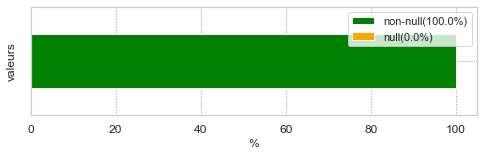

In [77]:
df = SimpleImputation(df)
verifier_taille(df)

In [78]:
dfs['credit_card_balance'] = df

## <a id='5-15'>Installments Payments</a>

Le data set contient :
	- 13605401 lignes et 8 colonnes.
	- 5810 valeurs manquantes, ce qui représente 0.01 % du data set.


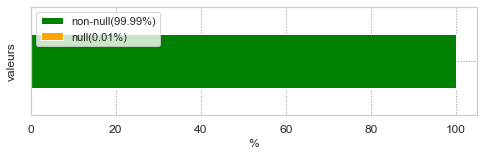

Voici les colonnes avec NaNs:


0            1
Column    DAYS_ENTRY_PAYMENT  AMT_PAYMENT
#NaN                    2905         2905
%NaN                    0.02         0.02
#Not_NaN            13602496     13602496
%Not_NaN               99.98        99.98

In [79]:
df = dfs['installments_payments']
verifier_taille(df)

Le data set contient :
	- 13605401 lignes et 8 colonnes.
	- 0 valeurs manquantes, ce qui représente 0.0 % du data set.


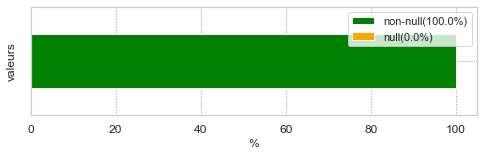

In [80]:
df = SimpleImputation(df)
verifier_taille(df)

In [81]:
dfs['installments_payments'] = df

## <a id='5-15'>POS CASH Balance</a>

Le data set contient :
	- 10001358 lignes et 8 colonnes.
	- 52158 valeurs manquantes, ce qui représente 0.07 % du data set.


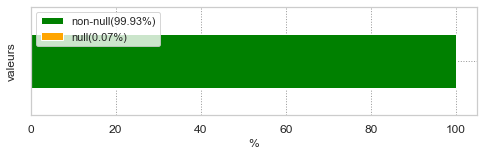

Voici les colonnes avec NaNs:


0               1
Column    CNT_INSTALMENT_FUTURE  CNT_INSTALMENT
#NaN                      26087           26071
%NaN                       0.26            0.26
#Not_NaN                9975271         9975287
%Not_NaN                  99.74           99.74

In [82]:
df = dfs['POS_CASH_balance']
verifier_taille(df)

Le data set contient :
	- 10001358 lignes et 8 colonnes.
	- 0 valeurs manquantes, ce qui représente 0.0 % du data set.


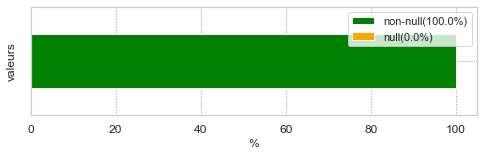

In [83]:
df = SimpleImputation(df)
verifier_taille(df)

In [84]:
dfs['POS_CASH_balance'] = df

# Data Merge & Aggregation

In [85]:
# run functions and pre_settings
def one_hot_encoder(df, nan_as_category=True):
    original_columns = list(df.columns)
    categorical_columns = colsOfType(df, 'object')
    df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

def group(df_to_agg, prefix, aggregations, aggregate_by= 'SK_ID_CURR'):
    agg_df = df_to_agg.groupby(aggregate_by).agg(aggregations)
    agg_df.columns = pd.Index(['{}{}_{}'.format(prefix, e[0], e[1].upper())
                               for e in agg_df.columns.tolist()])
    return agg_df.reset_index()

def group_and_merge(df_to_agg, df_to_merge, prefix, aggregations, aggregate_by= 'SK_ID_CURR'):
    agg_df = group(df_to_agg, prefix, aggregations, aggregate_by= aggregate_by)
    return df_to_merge.merge(agg_df, how='left', on= aggregate_by)

def do_sum(dataframe, group_cols, counted, agg_name):
    gp = dataframe[group_cols + [counted]].groupby(group_cols)[counted].sum().reset_index().rename(columns={counted: agg_name})
    dataframe = dataframe.merge(gp, on=group_cols, how='left')
    return dataframe

def reduce_mem_usage(dataframe):
    m_start = dataframe.memory_usage().sum() / 1024 ** 2
    for col in dataframe.columns:
        col_type = dataframe[col].dtype
        if col_type != object:
            c_min = dataframe[col].min()
            c_max = dataframe[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    dataframe[col] = dataframe[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    dataframe[col] = dataframe[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    dataframe[col] = dataframe[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    dataframe[col] = dataframe[col].astype(np.int64)
            elif str(col_type)[:5] == 'float':
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    dataframe[col] = dataframe[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    dataframe[col] = dataframe[col].astype(np.float32)
                else:
                    dataframe[col] = dataframe[col].astype(np.float64)

    m_end = dataframe.memory_usage().sum() / 1024 ** 2
    return dataframe

nan_as_category = True


def risk_groupanizer(dataframe, column_names, target_val=1, upper_limit_ratio=8.2, lower_limit_ratio=8.2):
    # one-hot encoder killer :-)
    all_cols = dataframe.columns
    for col in column_names:

        temp_df = dataframe.groupby([col] + ['TARGET'])[['SK_ID_CURR']].count().reset_index()
        temp_df['ratio%'] = round(temp_df['SK_ID_CURR']*100/temp_df.groupby([col])['SK_ID_CURR'].transform('sum'), 1)
        col_groups_high_risk = temp_df[(temp_df['TARGET'] == target_val) &
                                       (temp_df['ratio%'] >= upper_limit_ratio)][col].tolist()
        col_groups_low_risk = temp_df[(temp_df['TARGET'] == target_val) &
                                      (lower_limit_ratio >= temp_df['ratio%'])][col].tolist()
        if upper_limit_ratio != lower_limit_ratio:
            col_groups_medium_risk = temp_df[(temp_df['TARGET'] == target_val) &
                (upper_limit_ratio > temp_df['ratio%']) & (temp_df['ratio%'] > lower_limit_ratio)][col].tolist()

            for risk, col_groups in zip(['_high_risk', '_medium_risk', '_low_risk'],
                                        [col_groups_high_risk, col_groups_medium_risk, col_groups_low_risk]):
                dataframe[col + risk] = [1 if val in col_groups else 0 for val in dataframe[col].values]
        else:
            for risk, col_groups in zip(['_high_risk', '_low_risk'], [col_groups_high_risk, col_groups_low_risk]):
                dataframe[col + risk] = [1 if val in col_groups else 0 for val in dataframe[col].values]
        if dataframe[col].dtype == 'O' or dataframe[col].dtype == 'object':
            dataframe.drop(col, axis=1, inplace=True)
    return dataframe, list(set(dataframe.columns).difference(set(all_cols)))


In [86]:
def application():
    df = dfs['application_train']

    # general cleaning procedures
    # df = df[df['CODE_GENDER'] != 'XNA']
    # df = df[df['AMT_INCOME_TOTAL'] < 20000000] # remove a outlier 117M
    # # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    # df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True) # set null value
    df['DAYS_LAST_PHONE_CHANGE'].replace(0, np.nan, inplace=True) # set null value

    # Categorical features with Binary encode (0 or 1; two categories)
    for bin_feature in ['GENDER', 'OWN_CAR', 'OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
    
    # Categorical features with One-Hot encode
    df, cat_cols = one_hot_encoder(df, nan_as_category)

    # Flag_document features - count and kurtosis
    docs = [f for f in df.columns if 'FLAG_DOC' in f]
    df['DOCUMENT_COUNT'] = df[docs].sum(axis=1)
    df['NEW_DOC_KURT'] = df[docs].kurtosis(axis=1)

    def get_age_label(days_birth):
        """ Return the age group label (int). """
        age_years = -days_birth / 365
        if age_years < 27: return 1
        elif age_years < 40: return 2
        elif age_years < 50: return 3
        elif age_years < 65: return 4
        elif age_years < 99: return 5
        else: return 0
    # Categorical age - based on target=1 plot
    df['AGE_RANGE'] = df['DAYS_BIRTH'].apply(lambda x: get_age_label(x))

    # New features based on External sources
    df['EXT_SOURCES_PROD'] = df['EXT_SOURCE_1'] * df['EXT_SOURCE_2'] * df['EXT_SOURCE_3']
    np.warnings.filterwarnings('ignore', r'All-NaN (slice|axis) encountered')
    for function_name in ['min', 'max', 'mean', 'nanmedian', 'var']:
        feature_name = 'EXT_SOURCES_{}'.format(function_name.upper())
        df[feature_name] = eval('np.{}'.format(function_name))(
            df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']], axis=1)

    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

    # Credit ratios
    df['CREDIT_TO_GOODS_RATIO'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']
    
    # Income ratios
    df['INCOME_TO_EMPLOYED_RATIO'] = df['AMT_INCOME_TOTAL'] / df['DAYS_EMPLOYED']
    df['INCOME_TO_BIRTH_RATIO'] = df['AMT_INCOME_TOTAL'] / df['DAYS_BIRTH']
    
    # Time ratios
    df['ID_TO_BIRTH_RATIO'] = df['DAYS_ID_PUBLISH'] / df['DAYS_BIRTH']
    # df['CAR_TO_BIRTH_RATIO'] = df['OWN_CAR_AGE'] / df['DAYS_BIRTH']
    # df['CAR_TO_EMPLOYED_RATIO'] = df['OWN_CAR_AGE'] / df['DAYS_EMPLOYED']
    df['PHONE_TO_BIRTH_RATIO'] = df['DAYS_LAST_PHONE_CHANGE'] / df['DAYS_BIRTH']

    # EXT_SOURCE_X FEATURE
    # df['APPS_EXT_SOURCE_MEAN'] = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
    # df['APPS_EXT_SOURCE_STD'] = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
    # df['APPS_EXT_SOURCE_STD'] = df['APPS_EXT_SOURCE_STD'].fillna(df['APPS_EXT_SOURCE_STD'].mean())
    # df['APP_SCORE1_TO_BIRTH_RATIO'] = df['EXT_SOURCE_1'] / (df['DAYS_BIRTH'] / 365.25)
    # df['APP_SCORE2_TO_BIRTH_RATIO'] = df['EXT_SOURCE_2'] / (df['DAYS_BIRTH'] / 365.25)
    # df['APP_SCORE3_TO_BIRTH_RATIO'] = df['EXT_SOURCE_3'] / (df['DAYS_BIRTH'] / 365.25)
    # df['APP_SCORE1_TO_EMPLOY_RATIO'] = df['EXT_SOURCE_1'] / (df['DAYS_EMPLOYED'] / 365.25)
    # df['APP_EXT_SOURCE_2*EXT_SOURCE_3*DAYS_BIRTH'] = df['EXT_SOURCE_1'] * df['EXT_SOURCE_2'] * df['DAYS_BIRTH']
    # df['APP_SCORE1_TO_FAM_CNT_RATIO'] = df['EXT_SOURCE_1'] / df['CNT_FAM_MEMBERS']
    # df['APP_SCORE1_TO_GOODS_RATIO'] = df['EXT_SOURCE_1'] / df['AMT_GOODS_PRICE']
    # df['APP_SCORE1_TO_CREDIT_RATIO'] = df['EXT_SOURCE_1'] / df['AMT_CREDIT']
    # df['APP_SCORE1_TO_SCORE2_RATIO'] = df['EXT_SOURCE_1'] / df['EXT_SOURCE_2']
    # df['APP_SCORE1_TO_SCORE3_RATIO'] = df['EXT_SOURCE_1'] / df['EXT_SOURCE_3']
    # df['APP_SCORE2_TO_CREDIT_RATIO'] = df['EXT_SOURCE_2'] / df['AMT_CREDIT']
    # df['APP_SCORE2_TO_REGION_RATING_RATIO'] = df['EXT_SOURCE_2'] / df['REGION_RATING_CLIENT']
    # df['APP_SCORE2_TO_CITY_RATING_RATIO'] = df['EXT_SOURCE_2'] / df['REGION_RATING_CLIENT_W_CITY']
    # df['APP_SCORE2_TO_POP_RATIO'] = df['EXT_SOURCE_2'] / df['REGION_POPULATION_RELATIVE']
    # df['APP_SCORE2_TO_PHONE_CHANGE_RATIO'] = df['EXT_SOURCE_2'] / df['DAYS_LAST_PHONE_CHANGE']
    # df['APP_EXT_SOURCE_1*EXT_SOURCE_2'] = df['EXT_SOURCE_1'] * df['EXT_SOURCE_2']
    # df['APP_EXT_SOURCE_1*EXT_SOURCE_3'] = df['EXT_SOURCE_1'] * df['EXT_SOURCE_3']
    # df['APP_EXT_SOURCE_2*EXT_SOURCE_3'] = df['EXT_SOURCE_2'] * df['EXT_SOURCE_3']
    # df['APP_EXT_SOURCE_1*DAYS_EMPLOYED'] = df['EXT_SOURCE_1'] * df['DAYS_EMPLOYED']
    # df['APP_EXT_SOURCE_2*DAYS_EMPLOYED'] = df['EXT_SOURCE_2'] * df['DAYS_EMPLOYED']
    # df['APP_EXT_SOURCE_3*DAYS_EMPLOYED'] = df['EXT_SOURCE_3'] * df['DAYS_EMPLOYED']

    # AMT_INCOME_TOTAL : income
    # CNT_FAM_MEMBERS  : the number of family members
    df['APPS_GOODS_INCOME_RATIO'] = df['AMT_GOODS_PRICE'] / df['AMT_INCOME_TOTAL']
    df['APPS_CNT_FAM_INCOME_RATIO'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    
    # DAYS_BIRTH : Client's age in days at the time of application
    # DAYS_EMPLOYED : How many days before the application the person started current employment
    df['APPS_INCOME_EMPLOYED_RATIO'] = df['AMT_INCOME_TOTAL'] / df['DAYS_EMPLOYED']

    # other feature from better than 0.8
    df['CREDIT_TO_GOODS_RATIO_2'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']
    df['APP_AMT_INCOME_TOTAL_12_AMT_ANNUITY_ratio'] = df['AMT_INCOME_TOTAL'] / 12. - df['AMT_ANNUITY']
    df['APP_INCOME_TO_EMPLOYED_RATIO'] = df['AMT_INCOME_TOTAL'] / df['DAYS_EMPLOYED']
    df['APP_DAYS_LAST_PHONE_CHANGE_DAYS_EMPLOYED_ratio'] = df['DAYS_LAST_PHONE_CHANGE'] / df['DAYS_EMPLOYED']
    df['APP_DAYS_EMPLOYED_DAYS_BIRTH_diff'] = df['DAYS_EMPLOYED'] - df['DAYS_BIRTH']

    print('"Application_Train" final shape:', df.shape)
    return df

In [87]:
def bureau_bb():
    bureau = dfs['bureau']
    bb = dfs['bureau_balance']

    # Credit duration and credit/account end date difference
    bureau['CREDIT_DURATION'] = -bureau['DAYS_CREDIT'] + bureau['DAYS_CREDIT_ENDDATE']
    bureau['ENDDATE_DIF'] = bureau['DAYS_CREDIT_ENDDATE'] - bureau['DAYS_ENDDATE_FACT']
    
    # Credit to debt ratio and difference
    bureau['DEBT_PERCENTAGE'] = bureau['AMT_CREDIT_SUM'] / bureau['AMT_CREDIT_SUM_DEBT']
    bureau['DEBT_CREDIT_DIFF'] = bureau['AMT_CREDIT_SUM'] - bureau['AMT_CREDIT_SUM_DEBT']
    bureau['CREDIT_TO_ANNUITY_RATIO'] = bureau['AMT_CREDIT_SUM'] / bureau['AMT_ANNUITY']
    bureau['BUREAU_CREDIT_FACT_DIFF'] = bureau['DAYS_CREDIT'] - bureau['DAYS_ENDDATE_FACT']
    bureau['BUREAU_CREDIT_ENDDATE_DIFF'] = bureau['DAYS_CREDIT'] - bureau['DAYS_CREDIT_ENDDATE']
    bureau['BUREAU_CREDIT_DEBT_RATIO'] = bureau['AMT_CREDIT_SUM_DEBT'] / bureau['AMT_CREDIT_SUM']

    # CREDIT_DAY_OVERDUE :
    bureau['BUREAU_IS_DPD'] = bureau['CREDIT_DAY_OVERDUE'].apply(lambda x: 1 if x > 0 else 0)
    bureau['BUREAU_IS_DPD_OVER120'] = bureau['CREDIT_DAY_OVERDUE'].apply(lambda x: 1 if x > 120 else 0)

    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)

    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size', 'mean']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']

    #Status of Credit Bureau loan during the month
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')

    # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean', 'min'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean', 'max'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean', 'max', 'sum'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean', 'sum'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum'],
        'SK_ID_BUREAU': ['count'],
        'DAYS_ENDDATE_FACT': ['min', 'max', 'mean'],
        'ENDDATE_DIF': ['min', 'max', 'mean'],
        'BUREAU_CREDIT_FACT_DIFF': ['min', 'max', 'mean'],
        'BUREAU_CREDIT_ENDDATE_DIFF': ['min', 'max', 'mean'],
        'BUREAU_CREDIT_DEBT_RATIO': ['min', 'max', 'mean'],
        'DEBT_CREDIT_DIFF': ['min', 'max', 'mean'],
        'BUREAU_IS_DPD': ['mean', 'sum'],
        'BUREAU_IS_DPD_OVER120': ['mean', 'sum']
        }

    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']
    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])

    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')

    # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')

    print('"Bureau/Bureau Balance" final shape:', bureau_agg.shape)
    return bureau_agg

In [88]:
def previous_application():
    prev = dfs['previous_application']

    prev, cat_cols = one_hot_encoder(prev, nan_as_category=True)

    # Days 365.243 values -> nan
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace=True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace=True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace=True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace=True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace=True)

    # Add feature: value ask / value received percentage
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']

    # Feature engineering: ratios and difference
    # prev['APPLICATION_CREDIT_DIFF'] = prev['AMT_APPLICATION'] - prev['AMT_CREDIT']
    prev['CREDIT_TO_ANNUITY_RATIO'] = prev['AMT_CREDIT'] / prev['AMT_ANNUITY']
    prev['DOWN_PAYMENT_TO_CREDIT'] = prev['AMT_DOWN_PAYMENT'] / prev['AMT_CREDIT']

    # Interest ratio on previous application (simplified)
    total_payment = prev['AMT_ANNUITY'] * prev['CNT_PAYMENT']
    prev['SIMPLE_INTERESTS'] = (total_payment / prev['AMT_CREDIT'] - 1) / prev['CNT_PAYMENT']

    # Days last due difference (scheduled x done)
    # prev['DAYS_LAST_DUE_DIFF'] = prev['DAYS_LAST_DUE_1ST_VERSION'] - prev['DAYS_LAST_DUE']

    # from off
    # prev['PREV_GOODS_DIFF'] = prev['AMT_APPLICATION'] - prev['AMT_GOODS_PRICE']
    prev['PREV_ANNUITY_APPL_RATIO'] = prev['AMT_ANNUITY']/prev['AMT_APPLICATION']
    prev['PREV_GOODS_APPL_RATIO'] = prev['AMT_GOODS_PRICE'] / prev['AMT_APPLICATION']

    # Previous applications numeric features
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean', 'sum'],
        'AMT_APPLICATION': ['min', 'max', 'mean', 'sum'],
        'AMT_CREDIT': ['min', 'max', 'mean', 'sum'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean', 'sum'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
        'SK_ID_PREV': ['nunique'],
        'DAYS_TERMINATION': ['max'],
        'CREDIT_TO_ANNUITY_RATIO': ['mean', 'max'],
        # 'APPLICATION_CREDIT_DIFF': ['min', 'max', 'mean', 'sum'],
        'DOWN_PAYMENT_TO_CREDIT': ['mean'],
        # 'PREV_GOODS_DIFF': ['mean', 'max', 'sum'],
        'PREV_GOODS_APPL_RATIO': ['mean', 'max'],
        # 'DAYS_LAST_DUE_DIFF': ['mean', 'max', 'sum'],
        'SIMPLE_INTERESTS': ['mean', 'max']
    }

    # Previous applications categorical features
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']

    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])

    # Previous Applications: Approved Applications - only numerical features
    approved = prev[prev['CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')

    # Previous Applications: Refused Applications - only numerical features
    refused = prev[prev['CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')

    print('"Previous Applications" final shape:', prev_agg.shape)
    return prev_agg

In [89]:
def pos_cash():
    pos = dfs['POS_CASH_balance']

    pos, cat_cols = one_hot_encoder(pos, nan_as_category=True)

    # Flag months with late payment
    pos['LATE_PAYMENT'] = pos['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)
    pos['POS_IS_DPD'] = pos['SK_DPD'].apply(lambda x: 1 if x > 0 else 0) # <-- same with ['LATE_PAYMENT']
    pos['POS_IS_DPD_UNDER_120'] = pos['SK_DPD'].apply(lambda x: 1 if (x > 0) & (x < 120) else 0)
    pos['POS_IS_DPD_OVER_120'] = pos['SK_DPD'].apply(lambda x: 1 if x >= 120 else 0)

    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size', 'min'],
        'SK_DPD': ['max', 'mean', 'sum', 'var', 'min'],
        'SK_DPD_DEF': ['max', 'mean', 'sum'],
        'SK_ID_PREV': ['nunique'],
        'LATE_PAYMENT': ['mean'],
        'SK_ID_CURR': ['count'],
        'CNT_INSTALMENT': ['min', 'max', 'mean', 'sum'],
        'CNT_INSTALMENT_FUTURE': ['min', 'max', 'mean', 'sum'],
        'POS_IS_DPD': ['mean', 'sum'],
        'POS_IS_DPD_UNDER_120': ['mean', 'sum'],
        'POS_IS_DPD_OVER_120': ['mean', 'sum'],
    }

    for cat in cat_cols:
        aggregations[cat] = ['mean']

    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])

    # Count pos cash accounts
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()


    sort_pos = pos.sort_values(by=['SK_ID_PREV', 'MONTHS_BALANCE'])
    gp = sort_pos.groupby('SK_ID_PREV')
    df_pos = pd.DataFrame()
    df_pos['SK_ID_CURR'] = gp['SK_ID_CURR'].first()
    df_pos['MONTHS_BALANCE_MAX'] = gp['MONTHS_BALANCE'].max()

    # # Percentage of previous loans completed and completed before initial term
    # df_pos['POS_LOAN_COMPLETED_MEAN'] = gp['CONTRACT_STATUS_Completed'].mean()
    # df_pos['POS_COMPLETED_BEFORE_MEAN'] = gp['CNT_INSTALMENT'].first() - gp['CNT_INSTALMENT'].last()
    # df_pos['POS_COMPLETED_BEFORE_MEAN'] = df_pos.apply(lambda x: 1 if x['POS_COMPLETED_BEFORE_MEAN'] > 0 \
    #                                                                   and x['POS_LOAN_COMPLETED_MEAN'] > 0 else 0, axis=1)
    # Number of remaining installments (future installments) and percentage from total
    df_pos['POS_REMAINING_INSTALMENTS'] = gp['CNT_INSTALMENT_FUTURE'].last()
    df_pos['POS_REMAINING_INSTALMENTS_RATIO'] = gp['CNT_INSTALMENT_FUTURE'].last()/gp['CNT_INSTALMENT'].last()

    # Group by SK_ID_CURR and merge
    df_gp = df_pos.groupby('SK_ID_CURR').sum().reset_index()
    df_gp.drop(['MONTHS_BALANCE_MAX'], axis=1, inplace= True)
    pos_agg = pd.merge(pos_agg, df_gp, on= 'SK_ID_CURR', how= 'left')

    # Percentage of late payments for the 3 most recent applications
    pos = do_sum(pos, ['SK_ID_PREV'], 'LATE_PAYMENT', 'LATE_PAYMENT_SUM')

    # Last month of each application
    last_month_df = pos.groupby('SK_ID_PREV')['MONTHS_BALANCE'].idxmax()

    # Most recent applications (last 3)
    sort_pos = pos.sort_values(by=['SK_ID_PREV', 'MONTHS_BALANCE'])
    gp = sort_pos.iloc[last_month_df].groupby('SK_ID_CURR').tail(3)
    gp_mean = gp.groupby('SK_ID_CURR').mean().reset_index()
    pos_agg = pd.merge(pos_agg, gp_mean[['SK_ID_CURR', 'LATE_PAYMENT_SUM']], on='SK_ID_CURR', how='left')

    print('"Pos-Cash" balance final shape:', pos_agg.shape) 
    return pos_agg

In [90]:
def installment():
    ins = dfs['installments_payments']

    ins, cat_cols = one_hot_encoder(ins, nan_as_category=True)

    # Group payments and get Payment difference
    ins = do_sum(ins, ['SK_ID_PREV', 'NUM_INSTALMENT_NUMBER'], 'AMT_PAYMENT', 'AMT_PAYMENT_GROUPED')
    # ins['PAYMENT_DIFFERENCE'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT_GROUPED']
    ins['PAYMENT_RATIO'] = ins['AMT_INSTALMENT'] / ins['AMT_PAYMENT_GROUPED']
    ins['PAID_OVER_AMOUNT'] = ins['AMT_PAYMENT'] - ins['AMT_INSTALMENT']
    ins['PAID_OVER'] = (ins['PAID_OVER_AMOUNT'] > 0).astype(int)

    # Percentage and difference paid in each installment (amount paid and installment value)
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    # ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']

    # Days past due and days before due (no negative values)
    ins['DPD_diff'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD_diff'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD_diff'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD_diff'].apply(lambda x: x if x > 0 else 0)

    # Flag late payment
    ins['LATE_PAYMENT'] = ins['DBD'].apply(lambda x: 1 if x > 0 else 0)
    ins['INSTALMENT_PAYMENT_RATIO'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['LATE_PAYMENT_RATIO'] = ins.apply(lambda x: x['INSTALMENT_PAYMENT_RATIO'] if x['LATE_PAYMENT'] == 1 else 0, axis=1)

    # Flag late payments that have a significant amount
    ins['SIGNIFICANT_LATE_PAYMENT'] = ins['LATE_PAYMENT_RATIO'].apply(lambda x: 1 if x > 0.05 else 0)
    
    # Flag k threshold late payments
    ins['DPD_7'] = ins['DPD'].apply(lambda x: 1 if x >= 7 else 0)
    ins['DPD_15'] = ins['DPD'].apply(lambda x: 1 if x >= 15 else 0)

    ins['INS_IS_DPD_UNDER_120'] = ins['DPD'].apply(lambda x: 1 if (x > 0) & (x < 120) else 0)
    ins['INS_IS_DPD_OVER_120'] = ins['DPD'].apply(lambda x: 1 if (x >= 120) else 0)

    # Features: Perform aggregations
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum', 'var'],
        'DBD': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        # 'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum', 'min'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum', 'min'],
        'SK_ID_PREV': ['size', 'nunique'],
        # 'PAYMENT_DIFFERENCE': ['mean'],
        'PAYMENT_RATIO': ['mean', 'max'],
        'LATE_PAYMENT': ['mean', 'sum'],
        'SIGNIFICANT_LATE_PAYMENT': ['mean', 'sum'],
        'LATE_PAYMENT_RATIO': ['mean'],
        'DPD_7': ['mean'],
        'DPD_15': ['mean'],
        'PAID_OVER': ['mean'],
        'DPD_diff':['mean', 'min', 'max'],
        'DBD_diff':['mean', 'min', 'max'],
        'DAYS_INSTALMENT': ['mean', 'max', 'sum'],
        'INS_IS_DPD_UNDER_120': ['mean', 'sum'],
        'INS_IS_DPD_OVER_120': ['mean', 'sum']
    }

    for cat in cat_cols:
        aggregations[cat] = ['mean']
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])

    # Count installments accounts
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()

    # from oof (DAYS_ENTRY_PAYMENT)
    cond_day = ins['DAYS_ENTRY_PAYMENT'] >= -365
    ins_d365_grp = ins[cond_day].groupby('SK_ID_CURR')
    ins_d365_agg_dict = {
        'SK_ID_CURR': ['count'],
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DAYS_ENTRY_PAYMENT': ['mean', 'max', 'sum'],
        'DAYS_INSTALMENT': ['mean', 'max', 'sum'],
        'AMT_INSTALMENT': ['mean', 'max', 'sum'],
        'AMT_PAYMENT': ['mean', 'max', 'sum'],
        # 'PAYMENT_DIFF': ['mean', 'min', 'max', 'sum'],
        'PAYMENT_PERC': ['mean', 'max'],
        'DPD_diff': ['mean', 'min', 'max'],
        'DPD': ['mean', 'sum'],
        'INS_IS_DPD_UNDER_120': ['mean', 'sum'],
        'INS_IS_DPD_OVER_120': ['mean', 'sum']}

    ins_d365_agg = ins_d365_grp.agg(ins_d365_agg_dict)
    ins_d365_agg.columns = ['INS_D365' + ('_').join(column).upper() for column in ins_d365_agg.columns.ravel()]

    ins_agg = ins_agg.merge(ins_d365_agg, on='SK_ID_CURR', how='left')

    print('"Installments Payments" final shape:', ins_agg.shape)
    return ins_agg

In [91]:
def credit_card():    
    cc = dfs['credit_card_balance']

    cc, cat_cols = one_hot_encoder(cc, nan_as_category=True)

    # Amount used from limit
    cc['LIMIT_USE'] = cc['AMT_BALANCE'] / cc['AMT_CREDIT_LIMIT_ACTUAL']
    # Current payment / Min payment
    cc['PAYMENT_DIV_MIN'] = cc['AMT_PAYMENT_CURRENT'] / cc['AMT_INST_MIN_REGULARITY']
    # Late payment <-- 'CARD_IS_DPD'
    cc['LATE_PAYMENT'] = cc['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)
    # How much drawing of limit
    cc['DRAWING_LIMIT_RATIO'] = cc['AMT_DRAWINGS_ATM_CURRENT'] / cc['AMT_CREDIT_LIMIT_ACTUAL']

    cc['CARD_IS_DPD_UNDER_120'] = cc['SK_DPD'].apply(lambda x: 1 if (x > 0) & (x < 120) else 0)
    cc['CARD_IS_DPD_OVER_120'] = cc['SK_DPD'].apply(lambda x: 1 if x >= 120 else 0)

    # General aggregations
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])

    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()

    # Last month balance of each credit card application
    last_ids = cc.groupby('SK_ID_PREV')['MONTHS_BALANCE'].idxmax()
    last_months_df = cc[cc.index.isin(last_ids)]
    cc_agg = group_and_merge(last_months_df,cc_agg,'CC_LAST_', {'AMT_BALANCE': ['mean', 'max']})

    CREDIT_CARD_TIME_AGG = {
        'AMT_BALANCE': ['mean', 'max'],
        'LIMIT_USE': ['max', 'mean'],
        'AMT_CREDIT_LIMIT_ACTUAL':['max'],
        'AMT_DRAWINGS_ATM_CURRENT': ['max', 'sum'],
        'AMT_DRAWINGS_CURRENT': ['max', 'sum'],
        'AMT_DRAWINGS_POS_CURRENT': ['max', 'sum'],
        'AMT_INST_MIN_REGULARITY': ['max', 'mean'],
        'AMT_PAYMENT_TOTAL_CURRENT': ['max','sum'],
        'AMT_TOTAL_RECEIVABLE': ['max', 'mean'],
        'CNT_DRAWINGS_ATM_CURRENT': ['max','sum', 'mean'],
        'CNT_DRAWINGS_CURRENT': ['max', 'mean', 'sum'],
        'CNT_DRAWINGS_POS_CURRENT': ['mean'],
        'SK_DPD': ['mean', 'max', 'sum'],
        'LIMIT_USE': ['min', 'max'],
        'DRAWING_LIMIT_RATIO': ['min', 'max'],
        'LATE_PAYMENT': ['mean', 'sum'],
        'CARD_IS_DPD_UNDER_120': ['mean', 'sum'],
        'CARD_IS_DPD_OVER_120': ['mean', 'sum']
    }

    for months in [12, 24, 48]:
        cc_prev_id = cc[cc['MONTHS_BALANCE'] >= -months]['SK_ID_PREV'].unique()
        cc_recent = cc[cc['SK_ID_PREV'].isin(cc_prev_id)]
        prefix = 'INS_{}M_'.format(months)
        cc_agg = group_and_merge(cc_recent, cc_agg, prefix, CREDIT_CARD_TIME_AGG)


    print('"Credit Card Balance" final shape:', cc_agg.shape)
    return cc_agg

In [92]:
def data_post_processing(dataframe):
    print(f'---=> the DATA POST-PROCESSING is beginning, the dataset has {dataframe.shape[1]} features')
    # keep index related columns
    index_cols = ['TARGET', 'SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV', 'index']

    dataframe = dataframe.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '_', x))
    print('names of feature are renamed')

    # Reduced memory usage
    dataframe = reduce_mem_usage(dataframe)
    print(f'---=> pandas data types of features in the dataset are converted for a reduced memory usage')

    # Remove non-informative columns
    noninformative_cols = []
    for col in dataframe.columns:
        if len(dataframe[col].value_counts()) < 2:
            noninformative_cols.append(col)

    dataframe.drop(noninformative_cols, axis=1, inplace=True)
    # print(f'---=> {dataframe.shape[1]} features are remained after removing non-informative features')

    # # Removing features not interesting for classifier
    # feature_num = dataframe.shape[1]
    # #this function does not work reason of insufficient memory, I added selected_feature manually!
    # auc_limit = 0.7
    # # dataframe = ligthgbm_feature_selection(dataframe, index_cols, auc_limit=auc_limit)
    # all_features = dataframe.columns.tolist()
    # selected_feature_df = pd.read_csv(path+'removed_cols_lgbm.csv')
    # selected_features = selected_feature_df.removed_cols.tolist()
    # remained_features = set(all_features).difference(set(selected_features))
    # dataframe = dataframe[remained_features]
    # print(f'{feature_num - dataframe.shape[1]} features are eliminated by LightGBM classifier with an {auc_limit} auc score limit in step I')
    # print(f'---=> {dataframe.shape[1]} features are remained after removing features not interesting for LightGBM classifier')


    # # generate new columns with risk_groupanizer
    # start_feats_num = dataframe.shape[1]
    # cat_cols = [col for col in dataframe.columns if 3 < len(dataframe[col].value_counts()) < 20 and col not in index_cols]
    # dataframe, _ = risk_groupanizer(dataframe, column_names=cat_cols, upper_limit_ratio=8.1, lower_limit_ratio=8.1)
    # print(f'---=> {dataframe.shape[1] - start_feats_num} features are generated with the risk_groupanizer')


    # ending message of DATA POST-PROCESSING
    print(f'---=> the DATA POST-PROCESSING is ended!, now the dataset has a total {dataframe.shape[1]} features')

    gc.collect()
    return dataframe

In [93]:
df = application()
df = df.merge(bureau_bb(), how='left', on='SK_ID_CURR')
print('--=> df after merge with bureau:', df.shape)
df = df.merge(previous_application(), how='left', on='SK_ID_CURR')
print('--=> df after merge with previous application:', df.shape)
df = df.merge(pos_cash(), how='left', on='SK_ID_CURR')
print('--=> df after merge with pos cash :', df.shape)
df = df.merge(installment(), how='left', on='SK_ID_CURR')
print('--=> df after merge with installments:', df.shape)
df = df.merge(credit_card(), how='left', on='SK_ID_CURR')
print('--=> df after merge with credit card:', df.shape)
df = data_post_processing(df)

"Application_Train" final shape: (307505, 235)
"Bureau/Bureau Balance" final shape: (305811, 200)
--=> df after merge with bureau: (307505, 435)
"Previous Applications" final shape: (338857, 264)
--=> df after merge with previous application: (307505, 699)
"Pos-Cash" balance final shape: (337252, 44)
--=> df after merge with pos cash : (307505, 742)


C:\Users\Shadow\AppData\Local\Temp/ipykernel_31128/169731799.py:90: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



"Installments Payments" final shape: (339587, 76)
--=> df after merge with installments: (307505, 818)
"Credit Card Balance" final shape: (103558, 284)
--=> df after merge with credit card: (307505, 1101)
---=> the DATA POST-PROCESSING is beginning, the dataset has 1101 features
names of feature are renamed
---=> pandas data types of features in the dataset are converted for a reduced memory usage
---=> the DATA POST-PROCESSING is ended!, now the dataset has a total 1054 features


Le data set contient :
	- 307505 lignes et 1054 colonnes.
	- 92678986 valeurs manquantes, ce qui représente 28.59 % du data set.


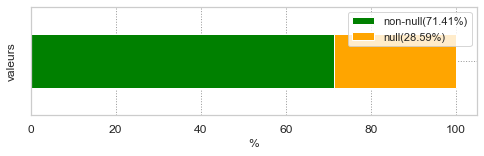

Voici les colonnes avec NaNs:


0                        1    \
Column    CC_PAYMENT_DIV_MIN_VAR  CC_PAYMENT_DIV_MIN_MEAN   
#NaN                      301064                   298971   
%NaN                       97.91                    97.22   
#Not_NaN                    6441                     8534   
%Not_NaN                    2.09                     2.78   

                             2                            3    \
Column    CC_PAYMENT_DIV_MIN_SUM  REFUSED_APP_CREDIT_PERC_VAR   
#NaN                      298893                       258348   
%NaN                        97.2                        84.01   
#Not_NaN                    8612                        49157   
%Not_NaN                     2.8                        15.99   

                                    4                              5    \
Column    ACTIVE_MONTHS_BALANCE_MIN_MIN  ACTIVE_MONTHS_BALANCE_MAX_MAX   
#NaN                             230986                         230986   
%NaN                              75.12                          75.12   
#Not_NaN                          76519                          76519   
%Not_NaN                          24.88                          24.88   

                                      6                              7    \
Column    ACTIVE_MONTHS_BALANCE_SIZE_MEAN  REFUSED_SIMPLE_INTERESTS_MEAN   
#NaN                               230986                         227201   
%NaN                                75.12                          73.89   
#Not_NaN                            76519                          80304   
%Not_NaN                            24.88                          26.11   

                                 8                              9    \
Column    CC_DRAWING_LIMIT_RATIO_VAR  CLOSED_MONTHS_BALANCE_MIN_MIN   
#NaN                          226928                         226770   
%NaN                            73.8                          73.75   
#Not_NaN                       80577                          80735   
%Not_NaN                        26.2                          26.25   

                                      10                             11   \
Column    CLOSED_MONTHS_BALANCE_SIZE_MEAN  CLOSED_MONTHS_BALANCE_MAX_MAX   
#NaN                               226770                         226770   
%NaN                                73.75                          73.75   
#Not_NaN                            80735                          80735   
%Not_NaN                            26.25                          26.25   

                                  12                          13   \
Column    CC_DRAWING_LIMIT_RATIO_MEAN  CC_DRAWING_LIMIT_RATIO_SUM   
#NaN                           225775                      225697   
%NaN                            73.42                        73.4   
#Not_NaN                        81730                       81808   
%Not_NaN                        26.58                        26.6   

                       14                 15                16   \
Column    CC_LIMIT_USE_VAR  CC_LIMIT_USE_MEAN  CC_LIMIT_USE_MAX   
#NaN                222647             221914            221342   
%NaN                  72.4              72.17             71.98   
#Not_NaN             84858              85591             86163   
%Not_NaN              27.6              27.83             28.02   

                       17                     18                     19   \
Column    CC_LIMIT_USE_MIN  INS_24M_LIMIT_USE_MAX  INS_48M_LIMIT_USE_MIN   
#NaN                221342                 221342                 221342   
%NaN                 71.98                  71.98                  71.98   
#Not_NaN             86163                  86163                  86163   
%Not_NaN             28.02                  28.02                  28.02   

                            20                     21                     22   \
Column    INS_24M_LIMIT_USE_MIN  INS_48M_LIMIT_USE_MAX  INS_12M_LIMIT_USE_MIN   
#NaN                     221342                 

In [94]:
verifier_taille(df)

In [95]:
nan_cols(df, 50)

Column    #NaN   %NaN  #Not_NaN  %Not_NaN
0           CC_PAYMENT_DIV_MIN_VAR  301064  97.91      6441      2.09
1          CC_PAYMENT_DIV_MIN_MEAN  298971  97.22      8534      2.78
2           CC_PAYMENT_DIV_MIN_SUM  298893  97.20      8612      2.80
3      REFUSED_APP_CREDIT_PERC_VAR  258348  84.01     49157     15.99
4    ACTIVE_MONTHS_BALANCE_MAX_MAX  230986  75.12     76519     24.88
..                             ...     ...    ...       ...       ...
325         REFUSED_AMT_CREDIT_SUM  207215  67.39    100290     32.61
326        REFUSED_AMT_CREDIT_MEAN  207215  67.39    100290     32.61
327         REFUSED_AMT_CREDIT_MAX  207215  67.39    100290     32.61
328         REFUSED_AMT_CREDIT_MIN  207215  67.39    100290     32.61
329         ACTIVE_DAYS_CREDIT_VAR  164462  53.48    143043     46.52

[330 rows x 5 columns]

Le data set contient :
	- 307505 lignes et 724 colonnes.
	- 20131231 valeurs manquantes, ce qui représente 9.04 % du data set.


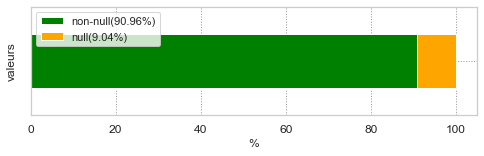

Voici les colonnes avec NaNs:


0                                1    \
Column    PREV_SIMPLE_INTERESTS_MEAN  PREV_PREV_GOODS_APPL_RATIO_MEAN   
#NaN                          151267                           134097   
%NaN                           49.19                            43.61   
#Not_NaN                      156238                           173408   
%Not_NaN                       50.81                            56.39   

                             2                                 3    \
Column    CLOSED_DAYS_CREDIT_VAR  PREV_DOWN_PAYMENT_TO_CREDIT_MEAN   
#NaN                      130849                            117167   
%NaN                       42.55                              38.1   
#Not_NaN                  176656                            190338   
%Not_NaN                   57.45                              61.9   

                       4                                     5    \
Column    LATE_PAYMENT_SUM  ACTIVE_BUREAU_CREDIT_DEBT_RATIO_MEAN   
#NaN                 99387                                 96439   
%NaN                 32.32                                 31.36   
#Not_NaN            208118                                211066   
%Not_NaN             67.68                                 68.64   

                                   6                                    7    \
Column    APPROVED_APP_CREDIT_PERC_VAR  ACTIVE_BUREAU_CREDIT_DEBT_RATIO_MAX   
#NaN                             94264                                93120   
%NaN                             30.65                                30.28   
#Not_NaN                        213241                               214385   
%Not_NaN                         69.35                                69.72   

                                          8                               9    \
Column    ACTIVE_BUREAU_CREDIT_DEBT_RATIO_MIN  INS_D365DAYS_ENTRY_PAYMENT_SUM   
#NaN                                    93120                           91636   
%NaN                                    30.28                            29.8   
#Not_NaN                               214385                          215869   
%Not_NaN                                69.72                            70.2   

                            10                        11   \
Column    INS_D365DPD_DIFF_MEAN  INS_D365SK_ID_CURR_COUNT   
#NaN                      91636                     91636   
%NaN                       29.8                      29.8   
#Not_NaN                 215869                    215869   
%Not_NaN                   70.2                      70.2   

                                             12   \
Column    INS_D365NUM_INSTALMENT_VERSION_NUNIQUE   
#NaN                                       91636   
%NaN                                        29.8   
#Not_NaN                                  215869   
%Not_NaN                                    70.2   

                                      13                                14   \
Column    INS_D365DAYS_ENTRY_PAYMENT_MEAN  INS_D365INS_IS_DPD_UNDER_120_SUM   
#NaN                                91636                             91636   
%NaN                                 29.8                              29.8   
#Not_NaN                           215869                            215869   
%Not_NaN                             70.2                              70.2   

                                        15               16   \
Column    INS_D365INS_IS_DPD_UNDER_120_MEAN  INS_D365DPD_SUM   
#NaN                                  91636            91636   
%NaN                                   29.8             29.8   
#Not_NaN                             215869           215869   
%Not_NaN                               70.2             70.2   

                       17                    18                    19   \
Column    INS_D365DPD_MEAN  INS_D365DPD_DIFF_MAX  INS_D365DPD_DIFF_MIN   
#NaN                 91636                 91636                 91636   
%NaN                  29.8              

In [96]:
nan_cols_list = nan_cols(df, 50)['Column'].tolist()
df.drop(columns=nan_cols_list, inplace=True)
verifier_taille(df)

In [97]:
df = df.replace([np.inf, -np.inf], np.nan)

Le data set contient :
	- 307505 lignes et 724 colonnes.
	- 0 valeurs manquantes, ce qui représente 0.0 % du data set.


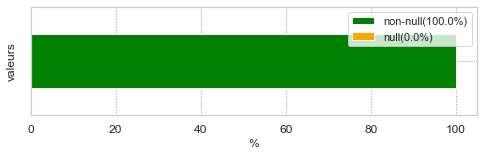

In [98]:
df = SimpleImputation(df)
verifier_taille(df)

# Remove Correlations

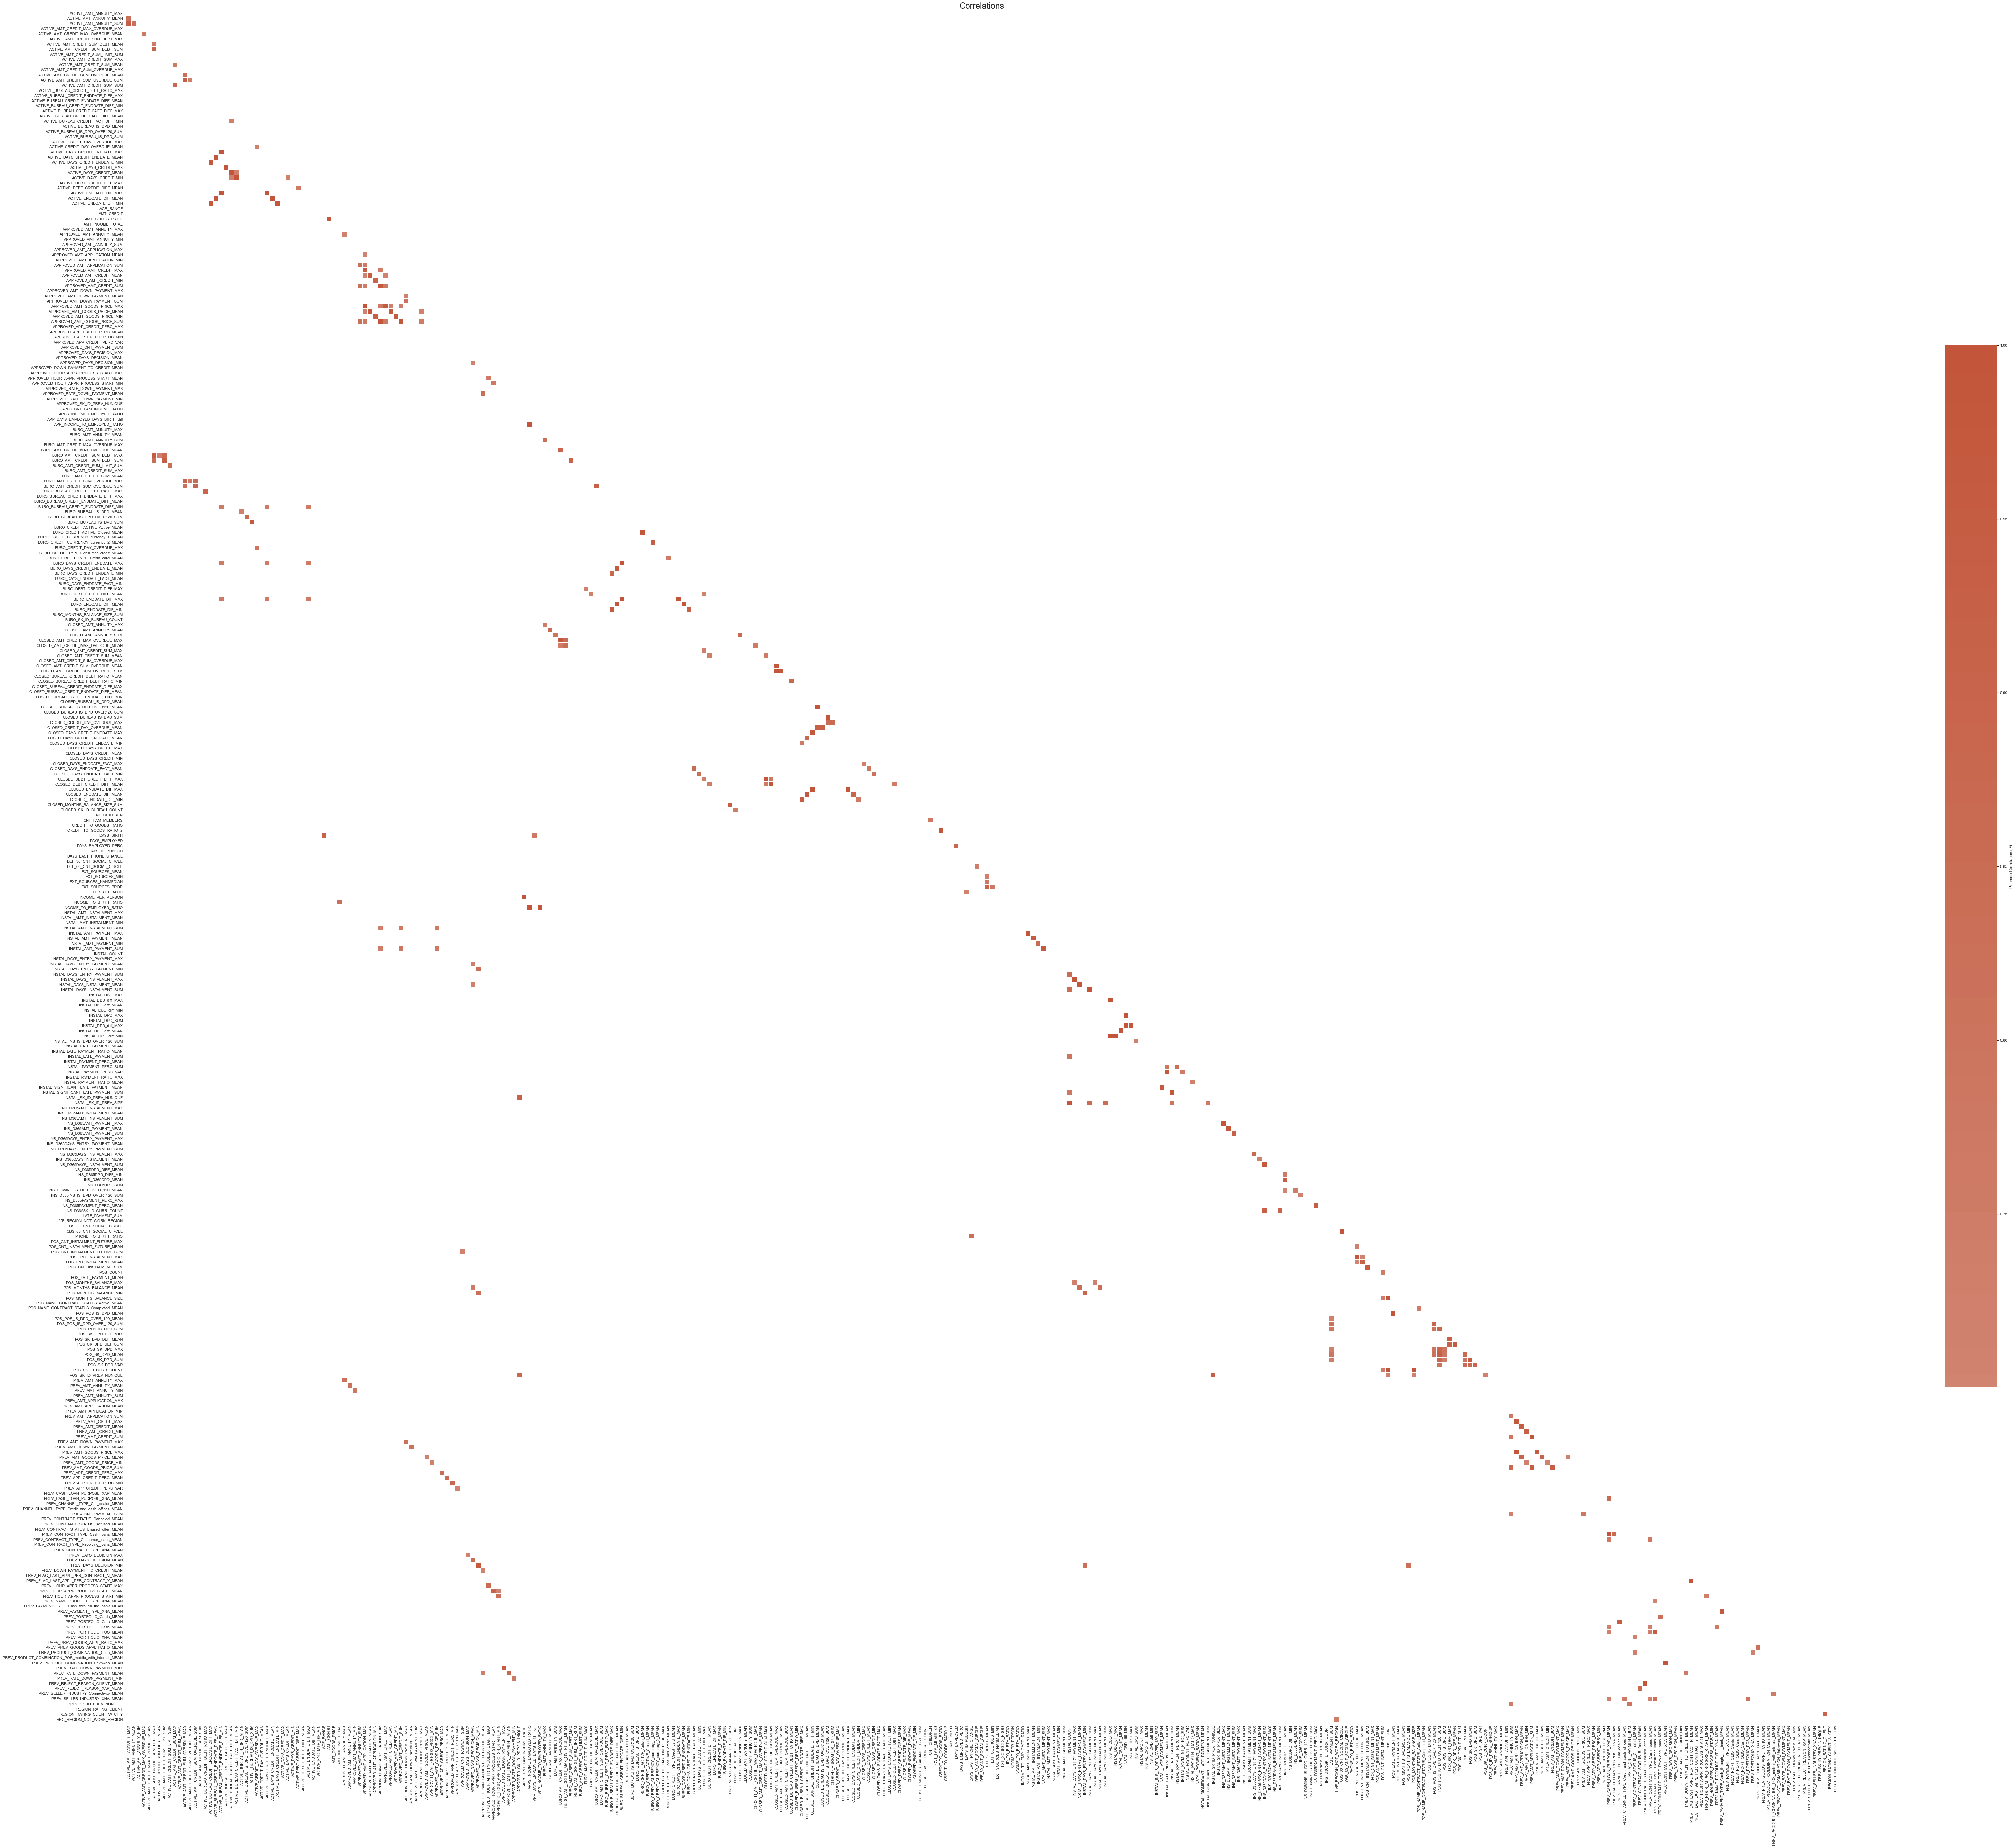

In [99]:
corrs = correlation_matrix(df, corr_seuil=0.7, sort=True)

In [100]:
df = df.drop(columns=removeCorrelations(corrs))

# Export

In [101]:
df.to_csv(path_data+'data.csv', index=False)

In [4]:
df = pd.read_csv(path_data+'data.csv')
df_sample = pd.concat([df[df.TARGET==0].iloc[:1000,:], df[df.TARGET==1].iloc[:1000,:]]).sort_values(by='SK_ID_CURR')
df_sample.to_csv(path_data+'data-sample.csv', index=False)